## Business Problem
#### It’s cheaper to get current customers to make a repeat purchase than it is to find new customers. And focusing on this will give companies a competitive edge over the others. It is essential for any business to understand its consumers and their requirements and also make an effort to re-engage current customers and get them back. 

## Machine Learning problem statement   
#### The key to improve customer retention is to understand the underlying metrics. And so the customers should be studied well. Customers' response towards the product, service, price, historical data of characteristics of customers, their transactions, interactions with them  etc can all be taken into consideration to predict the retention potential. As to what kind of customers are of high value and are likely to retain. 
#### Hence to classify the customers into the 3 divisions namely high/medium/low, we use machine learning classification algorithms by training the model with the available train data and test the model’s performance on unseen data. Retention Potential predictions will therefore help the retail company devise suitable marketing programs and retention strategies to target specific groups of retail customers as part of continued engagement.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

In [5]:
# Loading all 4 data sets at once
cust_data = pd.read_excel('Customerdata_Train.xlsx')
email_data = pd.read_excel('Emaildata_Train.xlsx')
trans_data = pd.read_excel('transactionsdata_Train.xlsx')
target_data=pd.read_excel('Train.xlsx')

In [6]:
# loading all 4 test sets
cust_test = pd.read_excel('Customerdata_Test.xlsx')
email_test = pd.read_excel('Emaildata_Test.xlsx')
trans_test = pd.read_excel('transactionsdata_Test.xlsx')

In [7]:
print(cust_data.shape)
print(email_data.shape)
print(trans_data.shape)
print(target_data.shape)

(23820, 7)
(517672, 6)
(104755, 4)
(23820, 2)


In [8]:
print(cust_test.shape)
print(email_test.shape)
print(trans_test.shape)

(5955, 7)
(129074, 6)
(26768, 4)


In [9]:
print(cust_data.columns)
print(email_data.columns)
print(trans_data.columns)
print(target_data.columns)

Index(['CustomerID', 'City', 'DateOfRegistration', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay'],
      dtype='object')
Index(['CustomerID', 'DateOfemail', 'EmailType', 'timestamp', 'MailOpened',
       'MailClicked'],
      dtype='object')
Index(['CustomerID', 'DateOfOrder', 'timestamp', 'OrderQuantity'], dtype='object')
Index(['CustomerID', 'RetentionPotential'], dtype='object')


In [10]:
print(cust_test.columns)
print(email_test.columns)
print(trans_test.columns)

Index(['CustomerID', 'City', 'DateOfRegistration', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay'],
      dtype='object')
Index(['CustomerID', 'DateOfemail', 'EmailType', 'timestamp', 'MailOpened',
       'MailClicked'],
      dtype='object')
Index(['CustomerID', 'DateOfOrder', 'timestamp', 'OrderQuantity'], dtype='object')


## Customer Data

In [11]:
cust_data.head(3)

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C16368,CITY2,2012-09-28,0,0,0,Monday
1,C20345,CITY2,2010-12-19,1,1,1,Friday
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday


In [12]:
cust_test.head(3)

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C17838,CITY4,2010-10-22,0,0,0,Thursday
1,C12403,CITY2,2008-11-17,1,1,0,Wednesday
2,C19041,CITY4,2011-01-24,0,1,0,Friday


In [13]:
# merging customer data and target data as both have equal no of samples.
merge_data1=pd.merge(cust_data, target_data, on='CustomerID', how='outer')

In [14]:
merge_data1.head(3)

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,RetentionPotential
0,C16368,CITY2,2012-09-28,0,0,0,Monday,High
1,C20345,CITY2,2010-12-19,1,1,1,Friday,Low
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday,Medium


### Descriptive Statictics  

In [15]:
merge_data1.describe()

,OnlineCommunication,AutomaticRefill,DoorstepDelivery
count,23820.000000,23820.000000,23820.000000
mean,0.660411,0.094710,0.037615
std,0.473580,0.292821,0.190268
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


In [16]:
cust_test.describe()

,OnlineCommunication,AutomaticRefill,DoorstepDelivery
count,5955.000000,5955.000000,5955.000000
mean,0.659278,0.095046,0.038959
std,0.473992,0.293303,0.193513
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


### Data inspection

In [17]:
def inspect_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Levels":data.apply(lambda x: x.unique().shape[0],axis=0), "Levels":data.apply(lambda x: str(x.unique()),axis=0)})
inspect_data(merge_data1)

,Data Type,No of Levels,Levels
CustomerID,object,23820,['C16368' 'C20345' 'C17683' ... 'C40967' 'C361...
City,object,4,['CITY2' 'CITY4' 'CITY3' 'CITY1']
DateOfRegistration,datetime64[ns],2673,[Timestamp('2012-09-28 00:00:00') Timestamp('2...
OnlineCommunication,int64,2,[0 1]
AutomaticRefill,int64,2,[0 1]
DoorstepDelivery,int64,2,[0 1]
PreferredDeliveryDay,object,7,['Monday' 'Friday' 'Wednesday' 'Tuesday' 'Thur...
RetentionPotential,object,3,['High' 'Low' 'Medium']


In [18]:
inspect_data(cust_test)

,Data Type,No of Levels,Levels
CustomerID,object,5955,['C17838' 'C12403' 'C19041' ... 'C38741' 'C204...
City,object,4,['CITY4' 'CITY2' 'CITY3' 'CITY1']
DateOfRegistration,datetime64[ns],1631,[Timestamp('2010-10-22 00:00:00') Timestamp('2...
OnlineCommunication,int64,2,[0 1]
AutomaticRefill,int64,2,[0 1]
DoorstepDelivery,int64,2,[0 1]
PreferredDeliveryDay,object,7,['Thursday' 'Wednesday' 'Friday' 'Monday' 'Tue...


### Value counts of each of the variables 

In [19]:
merge_data1['OnlineCommunication'].value_counts() 

1    15731
0     8089
Name: OnlineCommunication, dtype: int64

In [20]:
cust_test['OnlineCommunication'].value_counts() 

1    3926
0    2029
Name: OnlineCommunication, dtype: int64

In [21]:
merge_data1['AutomaticRefill'].value_counts() 

0    21564
1     2256
Name: AutomaticRefill, dtype: int64

In [22]:
cust_test['AutomaticRefill'].value_counts() 

0    5389
1     566
Name: AutomaticRefill, dtype: int64

In [23]:
merge_data1['DoorstepDelivery'].value_counts() 

0    22924
1      896
Name: DoorstepDelivery, dtype: int64

In [24]:
cust_test['DoorstepDelivery'].value_counts() 

0    5723
1     232
Name: DoorstepDelivery, dtype: int64

In [25]:
merge_data1['PreferredDeliveryDay'].value_counts() 

Tuesday      5343
Monday       5300
Friday       4167
Thursday     4043
Wednesday    3778
Saturday     1003
Sunday        186
Name: PreferredDeliveryDay, dtype: int64

In [26]:
cust_test['PreferredDeliveryDay'].value_counts() 

Monday       1350
Tuesday      1311
Friday       1052
Thursday     1008
Wednesday     968
Saturday      224
Sunday         42
Name: PreferredDeliveryDay, dtype: int64

In [27]:
merge_data1['RetentionPotential'].value_counts() 

Low       19185
High       3756
Medium      879
Name: RetentionPotential, dtype: int64

### Checking for null values

In [28]:
merge_data1.isnull().sum()

CustomerID              0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
RetentionPotential      0
dtype: int64

In [29]:
cust_test.isnull().sum()

CustomerID              0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
dtype: int64

## Exploratory Data Analysis of Customer data

### Checking for dates older than today in both train and test data

In [30]:
from datetime import date
today = date.today()
today= today.strftime("%Y-%m-%d")

In [31]:
print(merge_data1['DateOfRegistration'][merge_data1['DateOfRegistration']> today].count())

0


In [32]:
print(cust_data['DateOfRegistration'][cust_data['DateOfRegistration']> today].count())

0


### Extracting Month from 'DateOfRegistration' for registrations count of each month.

In [33]:
merge_data1['RegMonth'] = cust_data['DateOfRegistration'].map(lambda x: x.month )

In [34]:
cust_test['RegMonth'] = cust_test['DateOfRegistration'].map(lambda x: x.month )

Text(0.5, 0, 'RegMonth')

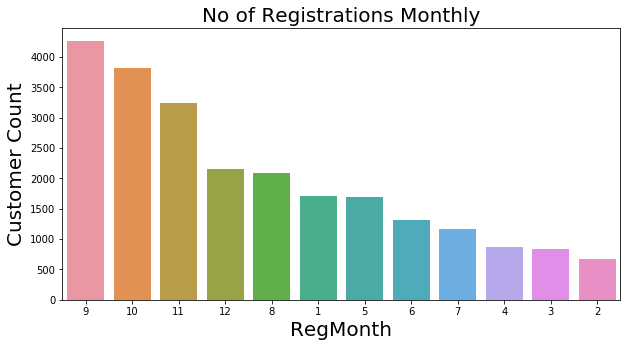

In [35]:
# There are more registrations during the last four months, which could be a festive or a holiday season. 
# offers, discounts vouchers and gift coupons can be provided to increase the registrations along with sales.
# more registrations in the year 2013
%matplotlib inline
plt.figure(figsize=(10,5))
sns.countplot(x = merge_data1.RegMonth, \
              order = merge_data1.RegMonth.value_counts().iloc[:].index, \
                                                      orient = 'v')
plt.title('No of Registrations Monthly', fontsize=20 )
plt.ylabel('Customer Count', fontsize = 20)
plt.xlabel('RegMonth', fontsize = 20)

### Checking if 'RegMonth' has an effect on the target variable (retention potential).

In [36]:
df=merge_data1.groupby(['RetentionPotential','RegMonth']).count().reset_index()
df.head(3)

,RetentionPotential,RegMonth,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,High,1,136,136,136,136,136,136,136
1,High,2,109,109,109,109,109,109,109
2,High,3,141,141,141,141,141,141,141


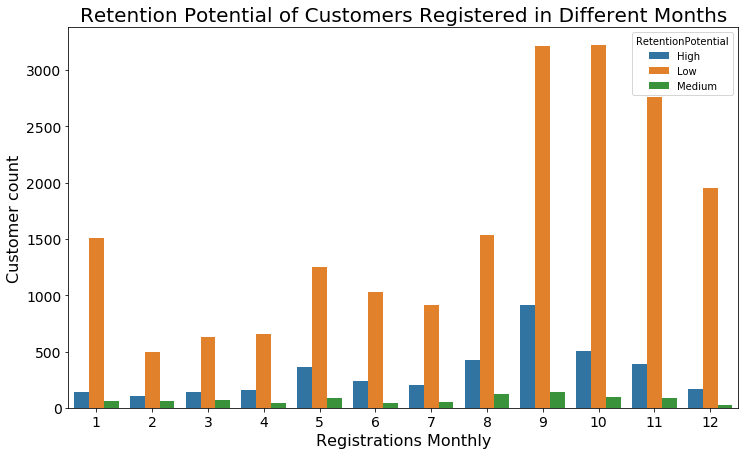

In [37]:
# In all the months Low> High> Medium
# Also, high is around 15-20 % of the low.
# Medium level customers are almost constant in all months
%matplotlib inline
plt.figure(figsize=(12,7))
sns.barplot(x='RegMonth',y='CustomerID',hue='RetentionPotential',data=df)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Registrations Monthly', fontsize= 16)
plt.ylabel('Customer count', fontsize= 16)
plt.title('Retention Potential of Customers Registered in Different Months', fontsize=20 )
plt.show()

### Extracting Year to check in which year the registrations are high

In [38]:
merge_data1['Year'] = merge_data1['DateOfRegistration'].map(lambda x: x.year )

In [39]:
cust_test['Year'] = cust_test['DateOfRegistration'].map(lambda x: x.year )

Text(0.5, 0, 'Registrations yearly')

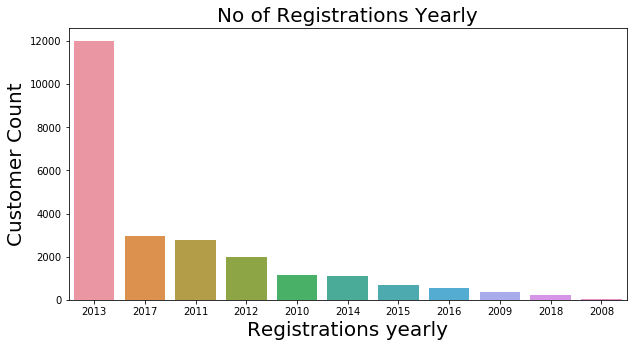

In [40]:
# more registrations in the year 2013
%matplotlib inline
plt.figure(figsize=(10,5))
sns.countplot(x = merge_data1.Year, \
              order = merge_data1.Year.value_counts().iloc[:].index, \
                                                      orient = 'v')
plt.title('No of Registrations Yearly', fontsize=20 )
plt.ylabel('Customer Count', fontsize = 20)
plt.xlabel('Registrations yearly', fontsize = 20)

In [41]:
df1=merge_data1.groupby(['RetentionPotential','Year']).count().reset_index()
df1.head(3)

,RetentionPotential,Year,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,RegMonth
0,High,2008,6,6,6,6,6,6,6,6
1,High,2009,119,119,119,119,119,119,119,119
2,High,2010,286,286,286,286,286,286,286,286


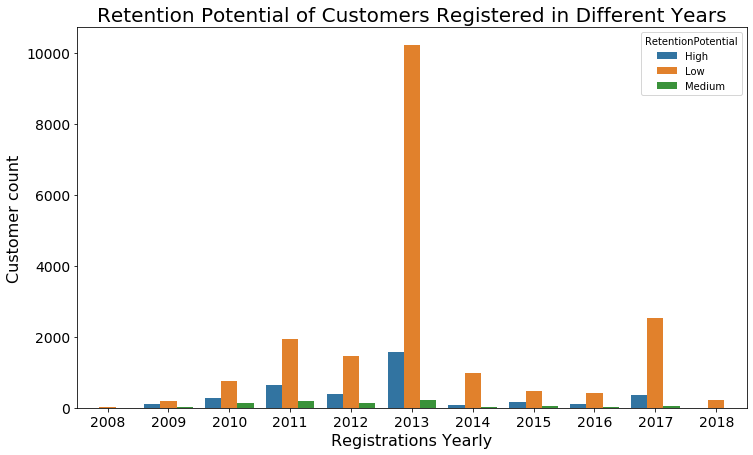

In [42]:
# there are hardly any medium or high retention potential customers in the year 2008 and 2018
%matplotlib inline
plt.figure(figsize=(12,7))
sns.barplot(x='Year',y='CustomerID',hue='RetentionPotential',data=df1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Registrations Yearly', fontsize= 16)
plt.ylabel('Customer count', fontsize= 16)
plt.title('Retention Potential of Customers Registered in Different Years', fontsize=20 )
plt.show()

### Checking city wise retention potential

In [43]:
df2=merge_data1.groupby(['RetentionPotential','City']).count().reset_index()
df2.head(3)

,RetentionPotential,City,CustomerID,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,RegMonth,Year
0,High,CITY1,125,125,125,125,125,125,125,125
1,High,CITY2,1257,1257,1257,1257,1257,1257,1257,1257
2,High,CITY3,866,866,866,866,866,866,866,866


Text(0.5, 0, 'Registrations by City')

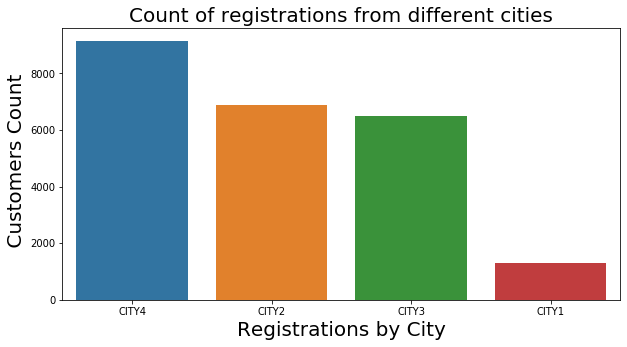

In [44]:
# the company should concentrate on city 1. Introduce special registration offers etc.
%matplotlib inline
plt.figure(figsize=(10,5))
sns.countplot(x = merge_data1.City, \
              order = merge_data1.City.value_counts().iloc[:].index, \
                                                      orient = 'v')
plt.title('Count of registrations from different cities', fontsize=20 )
plt.ylabel(' Customers Count', fontsize = 20)
plt.xlabel('Registrations by City', fontsize = 20)

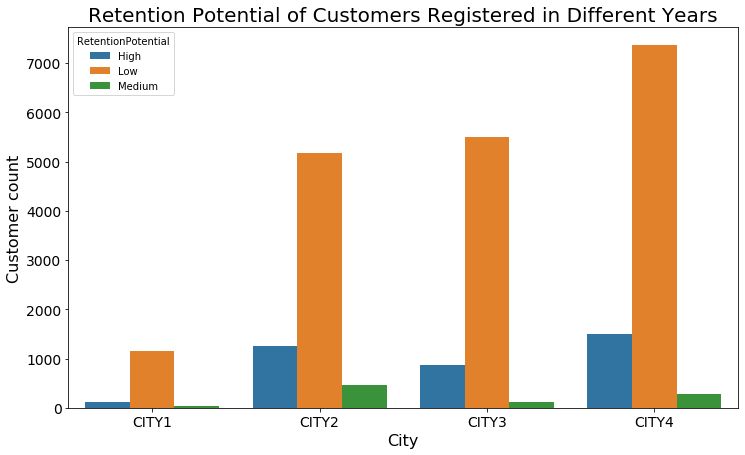

In [45]:
%matplotlib inline
plt.figure(figsize=(12,7))
sns.barplot(x='City',y='CustomerID',hue='RetentionPotential',data=df2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('City', fontsize= 16)
plt.ylabel('Customer count', fontsize= 16)
plt.title('Retention Potential of Customers Registered in Different Years', fontsize=20 )
plt.show()

### Converting date of registration to no of months(timespan) a customer has been there for.

In [46]:
from datetime import datetime
merge_data1['timespan'] = ((datetime.now() - merge_data1['DateOfRegistration']) / np.timedelta64(1, 'M')).astype(int)

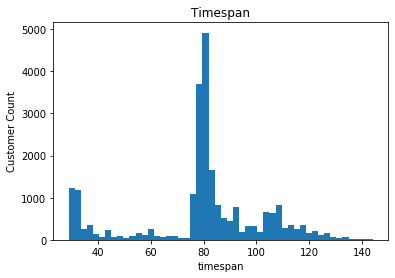

In [47]:
# there are around 12,000 customers of 60 to 80 months old.
plt.figsize=(10, 5)
plt.xlabel("timespan")
plt.ylabel("Customer Count")
plt.title("Timespan")
plt.hist(merge_data1.timespan, bins= 50)
plt.show()

### Checking Distribution of timespan for different classes of retention potential

In [48]:
group= merge_data1.groupby('RetentionPotential')

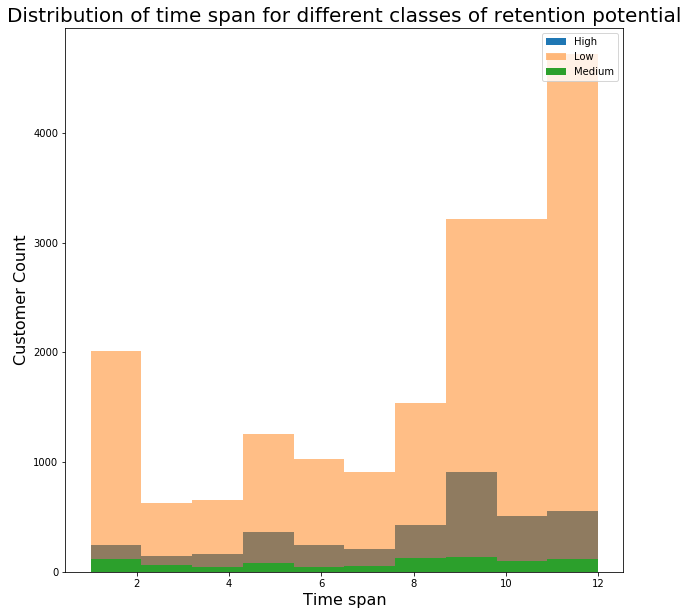

In [49]:
plt.figure(figsize=(10,10))
plt.hist(merge_data1.iloc[group.groups['High'],8],bins=10,alpha=1,label='High')
plt.hist(merge_data1.iloc[group.groups['Low'],8],bins=10,alpha=0.5,label='Low')
plt.hist(merge_data1.iloc[group.groups['Medium'],8],bins=10,alpha=1,label='Medium')
plt.xlabel('Time span', fontsize= 16)
plt.ylabel('Customer Count', fontsize= 16)
plt.title('Distribution of time span for different classes of retention potential',fontsize= 20)
plt.legend(loc='upper right')
plt.show()

In [50]:
merge_data1.drop('timespan',axis=1,inplace=True)

### Checking for cities which prefer doorstep delivery

In [51]:
df3=merge_data1.groupby(['City','DoorstepDelivery']).count().reset_index()
df3.head(3)

,City,DoorstepDelivery,CustomerID,DateOfRegistration,OnlineCommunication,AutomaticRefill,PreferredDeliveryDay,RetentionPotential,RegMonth,Year
0,CITY1,0,1224,1224,1224,1224,1224,1224,1224,1224
1,CITY1,1,84,84,84,84,84,84,84,84
2,CITY2,0,6833,6833,6833,6833,6833,6833,6833,6833


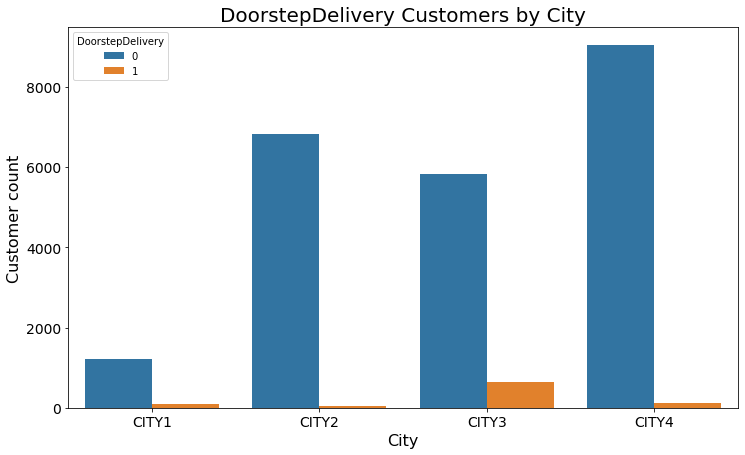

In [52]:
# city 3 prefers more door step delivery.
plt.figure(figsize=(12,7))
sns.barplot(x='City',y='CustomerID',hue='DoorstepDelivery',data=df3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('City', fontsize= 16)
plt.ylabel('Customer count', fontsize= 16)
plt.title('DoorstepDelivery Customers by City', fontsize=20 )
plt.show()


### Most preferred delivery day

Text(0.5, 0, 'Preferred Delivery Day')

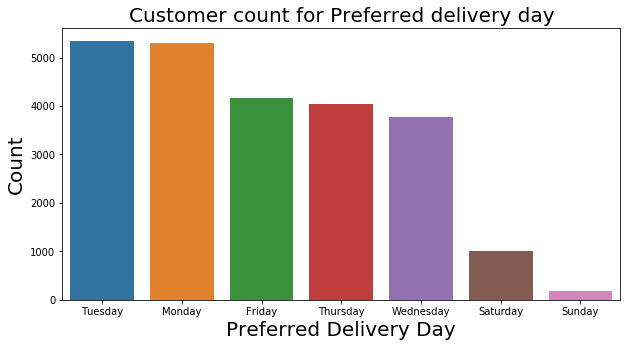

In [53]:
# More customers prefer being delivered on monday and tuesday. And very few on sunday.
%matplotlib inline
plt.figure(figsize=(10,5))
sns.countplot(x = merge_data1.PreferredDeliveryDay, \
              order = merge_data1.PreferredDeliveryDay.value_counts().iloc[:].index, \
                                                      orient = 'v')
plt.title('Customer count for Preferred delivery day', fontsize=20 )
plt.ylabel('Count', fontsize = 20)
plt.xlabel('Preferred Delivery Day', fontsize = 20)

### PreferredDeliveryDay of Customers by City

In [54]:
df4=merge_data1[['City','PreferredDeliveryDay','CustomerID']].groupby(['City','PreferredDeliveryDay']).count().reset_index()
df4.head(3)

,City,PreferredDeliveryDay,CustomerID
0,CITY1,Friday,23
1,CITY1,Monday,100
2,CITY1,Saturday,371


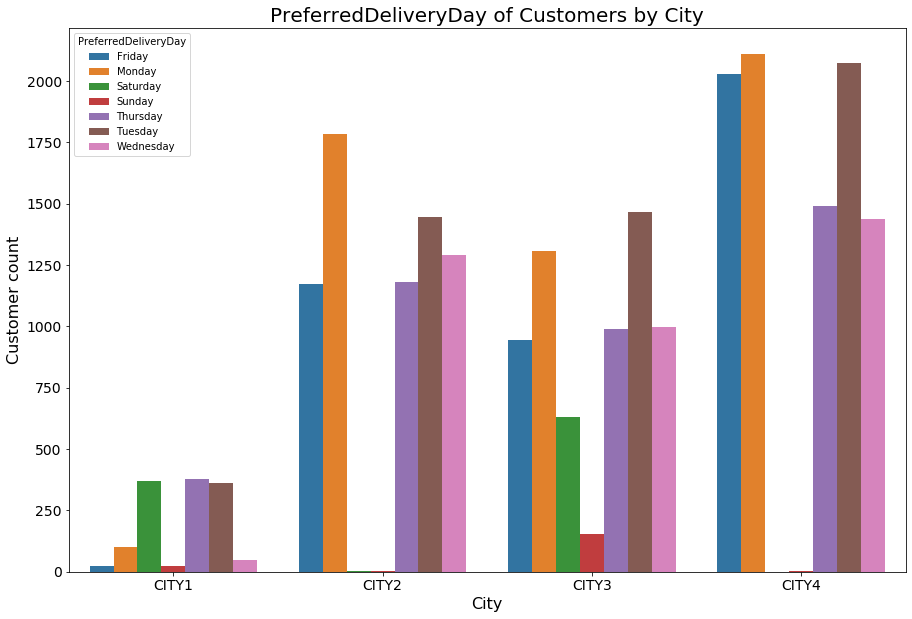

In [55]:
plt.figure(figsize=(15,10))
sns.barplot(x='City',y='CustomerID',hue='PreferredDeliveryDay',data=df4)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('City', fontsize= 16)
plt.ylabel('Customer count', fontsize= 16)
plt.title('PreferredDeliveryDay of Customers by City', fontsize=20 )
plt.show()

### Door Step Delivery Vs Preferred Delivery Day

In [56]:
df5=merge_data1[['DoorstepDelivery','PreferredDeliveryDay','CustomerID']].groupby(['DoorstepDelivery','PreferredDeliveryDay']).count().reset_index()
df5.head(3)

,DoorstepDelivery,PreferredDeliveryDay,CustomerID
0,0,Friday,3992
1,0,Monday,5034
2,0,Saturday,939


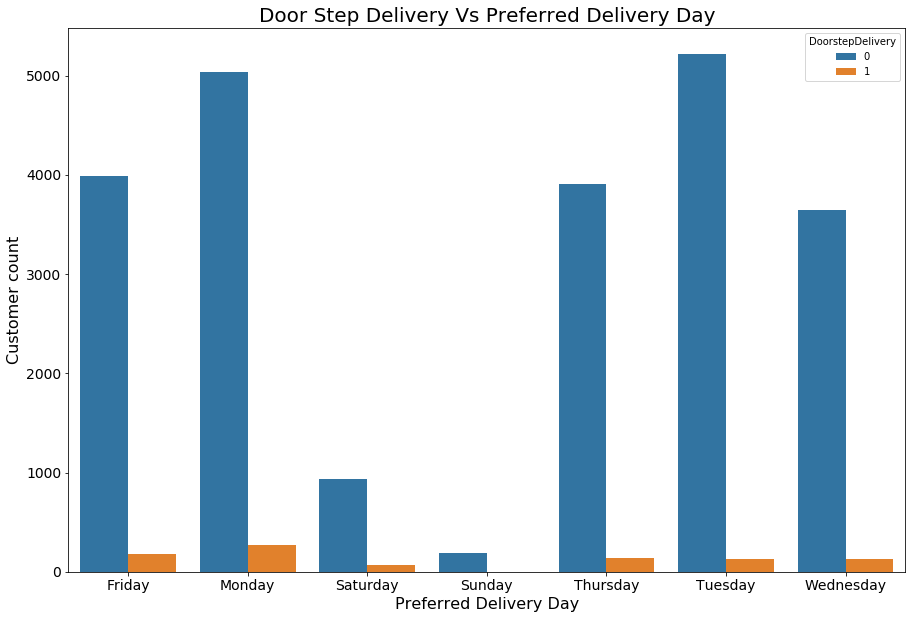

In [57]:
# wanted to check if customers filled in preferred delivery day even though they didnt want to get it delivered to their door.
# this is possible if the retailers would deliver it to a pick up point and the customers take it from there.
# most door step delivery happens on a Monday.
plt.figure(figsize=(15,10))
sns.barplot(x='PreferredDeliveryDay',y='CustomerID',hue='DoorstepDelivery',data=df5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Preferred Delivery Day', fontsize= 16)
plt.ylabel('Customer count', fontsize= 16)
plt.title('Door Step Delivery Vs Preferred Delivery Day', fontsize=20 )
plt.show()

### 'RetentionPotential' Vs 'AutomaticRefill'

In [58]:
df6=merge_data1[['RetentionPotential','AutomaticRefill','CustomerID']].groupby(['RetentionPotential','AutomaticRefill']).count().reset_index()

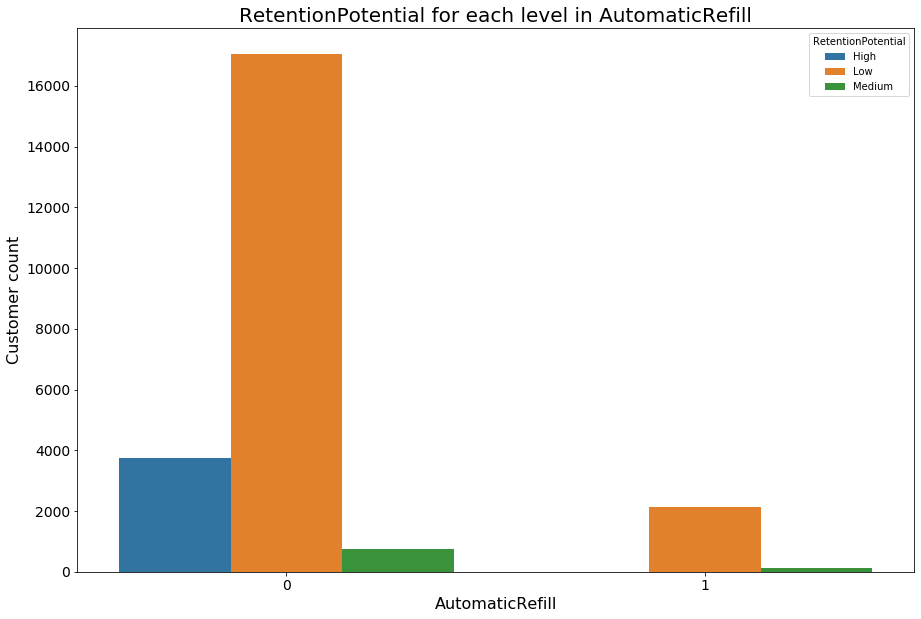

In [59]:
%matplotlib inline
plt.figure(figsize=(15,10))
sns.barplot(x='AutomaticRefill',y='CustomerID',hue='RetentionPotential',data=df6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('RetentionPotential for each level in AutomaticRefill', fontsize=20 )
plt.xlabel('AutomaticRefill', fontsize= 16)
plt.ylabel('Customer count', fontsize= 16)
plt.show()

### 'RetentionPotential' Vs 'OnlineCommunication'

In [60]:
df7=merge_data1[['RetentionPotential','OnlineCommunication','CustomerID']].groupby(['RetentionPotential','OnlineCommunication']).count().reset_index()

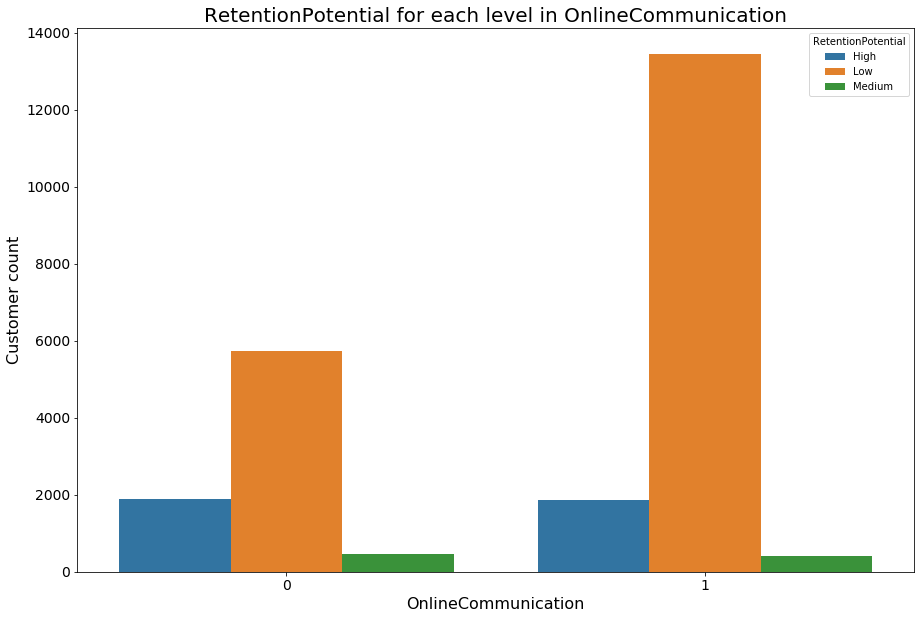

In [61]:
%matplotlib inline
plt.figure(figsize=(15,10))
sns.barplot(x='OnlineCommunication',y='CustomerID',hue='RetentionPotential',data=df7)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('RetentionPotential for each level in OnlineCommunication', fontsize=20 )
plt.ylabel('Customer count', fontsize= 16)
plt.xlabel('OnlineCommunication', fontsize= 16)
plt.show()

## Email Data

In [62]:
email_data.head(2)

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
0,C16368,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable
1,C20345,2010-12-19,WelcomeEmail,15:10:30,yes,NotApplicable


In [63]:
email_test.head(2)

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
0,C17838,2010-10-22,WelcomeEmail,16:59:02,yes,NotApplicable
1,C12403,2008-11-17,WelcomeEmail,12:46:56,yes,NotApplicable


### Data statistics and inspection of Email data

In [64]:
email_data.describe()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
count,517672,517672,517672,517672,517672,517672
unique,23820,3382,2,14369,2,3
top,C41705,2013-10-11,CustomizedEmail,15:14:02,no,no
freq,292,2139,493852,64,369812,466011


In [65]:
inspect_data(email_data)

,Data Type,No of Levels,Levels
CustomerID,object,23820,['C16368' 'C20345' 'C17683' ... 'C40967' 'C361...
DateOfemail,object,3382,['2012-09-28' '2010-12-19' '2010-10-03' ... '2...
EmailType,object,2,['WelcomeEmail' 'CustomizedEmail']
timestamp,object,14369,['15:56:50' '15:10:30' '17:12:24' ... '16:09:1...
MailOpened,object,2,['yes' 'no']
MailClicked,object,3,['NotApplicable' 'no' 'yes']


In [66]:
inspect_data(email_test)

,Data Type,No of Levels,Levels
CustomerID,object,5955,['C17838' 'C12403' 'C19041' ... 'C38741' 'C204...
DateOfemail,object,3149,['2010-10-22' '2008-11-17' '2011-01-24' ... '2...
EmailType,object,2,['WelcomeEmail' 'CustomizedEmail']
timestamp,object,14366,['16:59:02' '12:46:56' '14:35:22' ... '14:51:3...
MailOpened,object,2,['yes' 'no']
MailClicked,object,3,['NotApplicable' 'no' 'yes']


### Null values

In [67]:
email_data.isnull().sum()

CustomerID     0
DateOfemail    0
EmailType      0
timestamp      0
MailOpened     0
MailClicked    0
dtype: int64

In [68]:
email_test.isnull().sum()

CustomerID     0
DateOfemail    0
EmailType      0
timestamp      0
MailOpened     0
MailClicked    0
dtype: int64

### Value Counts

In [69]:
email_data['EmailType'].value_counts() 

CustomizedEmail    493852
WelcomeEmail        23820
Name: EmailType, dtype: int64

In [70]:
email_test['EmailType'].value_counts() 

CustomizedEmail    123119
WelcomeEmail         5955
Name: EmailType, dtype: int64

In [71]:
email_data['MailOpened'].value_counts() 

no     369812
yes    147860
Name: MailOpened, dtype: int64

In [72]:
email_test['MailOpened'].value_counts() 

no     92296
yes    36778
Name: MailOpened, dtype: int64

In [73]:
email_data['MailClicked'].value_counts() 

no               466011
yes               27841
NotApplicable     23820
Name: MailClicked, dtype: int64

In [74]:
email_test['MailClicked'].value_counts() 

no               116201
yes                6918
NotApplicable      5955
Name: MailClicked, dtype: int64

## Exploratory Data Analysis of Email data

In [75]:
# checking for older dates
print(email_data['DateOfemail'][email_data['DateOfemail'] > today].count())
print(email_test['DateOfemail'][email_test['DateOfemail'] > today].count())

0
0


### Dropping duplicate values if exist based on the all columns.

In [76]:
# mails are sent very frequently. some times every 3-4 days 
email_data.sort_values('CustomerID').head(10)

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
338930,C12116,2013-09-27,CustomizedEmail,16:20:48,no,no
338904,C12116,2013-10-09,CustomizedEmail,10:32:52,no,no
338905,C12116,2013-09-30,CustomizedEmail,16:34:10,no,no
338906,C12116,2013-10-06,CustomizedEmail,12:20:46,no,no
338907,C12116,2013-10-01,CustomizedEmail,17:21:24,no,no
338908,C12116,2013-10-05,CustomizedEmail,17:02:02,no,no
338909,C12116,2013-10-01,CustomizedEmail,17:20:28,no,no
338910,C12116,2013-09-26,CustomizedEmail,14:32:38,no,no
338911,C12116,2013-10-07,CustomizedEmail,15:50:50,no,no
338912,C12116,2013-09-29,CustomizedEmail,12:31:32,no,no


In [77]:
email_data.drop_duplicates(subset=['CustomerID','DateOfemail','timestamp','EmailType','MailOpened','MailClicked'], keep='first', inplace=True)

In [78]:
email_test.drop_duplicates(subset=['CustomerID','DateOfemail','timestamp','EmailType','MailOpened','MailClicked'], keep='first', inplace=True)

In [79]:
#  no duplicate values.
email_data.shape

(517672, 6)

In [80]:
email_test.shape

(129074, 6)

### Dealing with 'EmailType'

In [81]:
# all customers received WelcomeEmails when they registered.
g=email_data.loc[email_data['EmailType']=='WelcomeEmail',['CustomerID','EmailType','MailOpened','MailClicked']]
g.count()

CustomerID     23820
EmailType      23820
MailOpened     23820
MailClicked    23820
dtype: int64

In [82]:
# all the mails were opened, so the mail might probably have a registration link.
g.loc[g['MailOpened'] == 'yes'].count()

CustomerID     23820
EmailType      23820
MailOpened     23820
MailClicked    23820
dtype: int64

In [83]:
# all the values for mailclicked are the same as well.
g.loc[g['MailClicked'] == 'NotApplicable'].count()

CustomerID     23820
EmailType      23820
MailOpened     23820
MailClicked    23820
dtype: int64

In [84]:
b=email_test.loc[email_test['EmailType']=='WelcomeEmail',['CustomerID','EmailType','MailOpened','MailClicked']]
b.count()

CustomerID     5955
EmailType      5955
MailOpened     5955
MailClicked    5955
dtype: int64

In [85]:
b.loc[b['MailOpened'] == 'yes'].count()

CustomerID     5955
EmailType      5955
MailOpened     5955
MailClicked    5955
dtype: int64

In [86]:
b.loc[b['MailClicked'] == 'NotApplicable'].count()

CustomerID     5955
EmailType      5955
MailOpened     5955
MailClicked    5955
dtype: int64

Text(0.5, 0, 'Email Type')

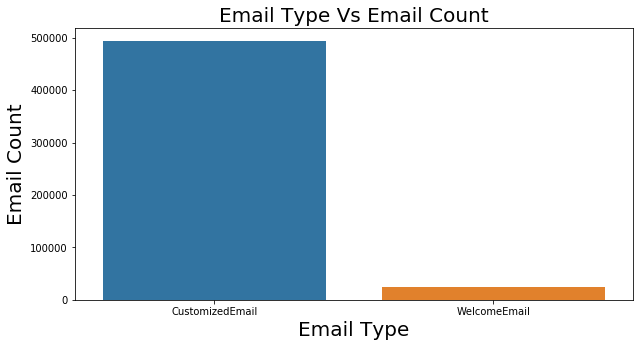

In [87]:
%matplotlib inline
plt.figure(figsize=(10,5))
sns.countplot(x = email_data.EmailType, \
              order = email_data.EmailType.value_counts().iloc[:].index, \
                                                      orient = 'v')
plt.title('Email Type Vs Email Count', fontsize=20 )
plt.ylabel('Email Count', fontsize = 20)
plt.xlabel('Email Type', fontsize = 20)

In [88]:
#since all the welcome emails have the same class through out all columns,it can be dropped.
# on the day of registration a customer recieves a welcome email.
email_data.drop(email_data[email_data['EmailType']=='WelcomeEmail'].index, inplace=True) 
email_test.drop(email_test[email_test['EmailType']=='WelcomeEmail'].index, inplace=True) 

In [89]:
# dropping emailtype as it's left with one unique value
email_data.drop(['EmailType'],axis=1,inplace=True)
email_test.drop(['EmailType'],axis=1,inplace=True)

In [90]:
# 9709 have received only welcome emails.
email_data.nunique()

CustomerID     14111
DateOfemail     3354
timestamp      14369
MailOpened         2
MailClicked        2
dtype: int64

### Creating new column 'Mailcount'

In [91]:
# creating a new column Mailcount, which gives the no of emails sent to each customer.
email_data['Mailcount'] = email_data.groupby('CustomerID')['CustomerID'].transform('count')
email_test['Mailcount'] = email_test.groupby('CustomerID')['CustomerID'].transform('count')

In [92]:
df=email_data[['CustomerID', 'Mailcount']].groupby('CustomerID').count().sort_values('Mailcount',ascending=False).reset_index()

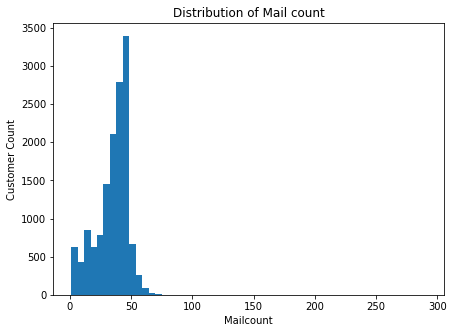

In [93]:
# more no of customers have received mails of range 20-50 
plt.figure(figsize=(7,5))
plt.xlabel("Mailcount")
plt.ylabel("Customer Count")
plt.title("Distribution of Mail count")
plt.hist(df.Mailcount, bins=55)
plt.show()

### Converting 'DateOfemail' to datetime.

In [94]:
email_data['DateOfemail'] = pd.to_datetime(email_data['DateOfemail'])
email_test['DateOfemail'] = pd.to_datetime(email_test['DateOfemail'])

### Extracting a column MailDay which is a weekday name, from DateOfemail. 

In [95]:
email_data=email_data.assign(MailDay=email_data['DateOfemail'].dt.weekday_name)
email_test=email_test.assign(MailDay=email_test['DateOfemail'].dt.weekday_name)

In [96]:
email_data.head(3)

,CustomerID,DateOfemail,timestamp,MailOpened,MailClicked,Mailcount,MailDay
23820,C16368,2013-05-20,15:10:30,yes,no,29,Monday
23821,C16368,2013-02-05,13:54:22,yes,no,29,Tuesday
23822,C16368,2012-11-26,11:22:32,yes,no,29,Monday


### 'MailDay' Vs 'MailOpened'

In [97]:
df1=email_data.groupby(['MailDay','MailOpened']).count().reset_index()
df1.head(3)

,MailDay,MailOpened,CustomerID,DateOfemail,timestamp,MailClicked,Mailcount
0,Friday,no,51712,51712,51712,51712,51712
1,Friday,yes,17641,17641,17641,17641,17641
2,Monday,no,53178,53178,53178,53178,53178


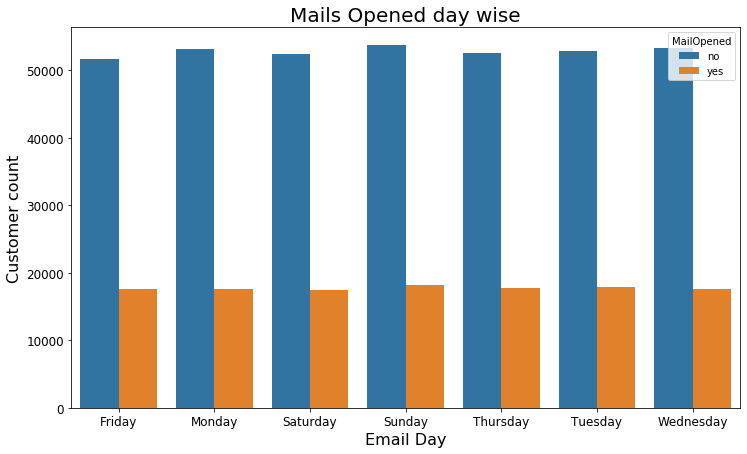

In [98]:
plt.figure(figsize=(12,7))
sns.barplot(x='MailDay',y='CustomerID',hue='MailOpened',data=df1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Email Day', fontsize= 16)
plt.ylabel('Customer count', fontsize= 16)
plt.title('Mails Opened day wise', fontsize=20 )
plt.show()

### 'MailDay' Vs 'MailClicked'

In [99]:
df2=email_data.groupby(['MailDay','MailClicked']).count().reset_index()
df2.head(3)

,MailDay,MailClicked,CustomerID,DateOfemail,timestamp,MailOpened,Mailcount
0,Friday,no,65353,65353,65353,65353,65353
1,Friday,yes,4000,4000,4000,4000,4000
2,Monday,no,66764,66764,66764,66764,66764


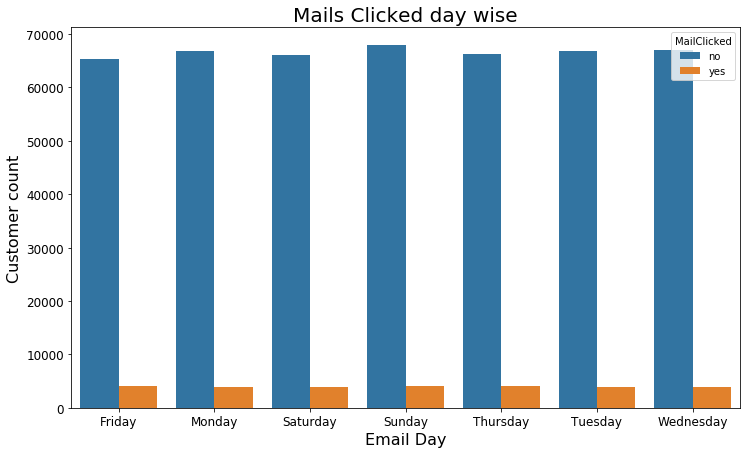

In [100]:
plt.figure(figsize=(12,7))
sns.barplot(x='MailDay',y='CustomerID',hue='MailClicked',data=df2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Email Day', fontsize= 16)
plt.ylabel('Customer count', fontsize= 16)
plt.title('Mails Clicked day wise', fontsize=20 )
plt.show()

### 'MailOpened' Vs 'MailClicked'

In [101]:
df3=email_data.groupby(['MailOpened','MailClicked']).count().reset_index()
df3.head(3)

,MailOpened,MailClicked,CustomerID,DateOfemail,timestamp,Mailcount,MailDay
0,no,no,369483,369483,369483,369483,369483
1,no,yes,329,329,329,329,329
2,yes,no,96528,96528,96528,96528,96528


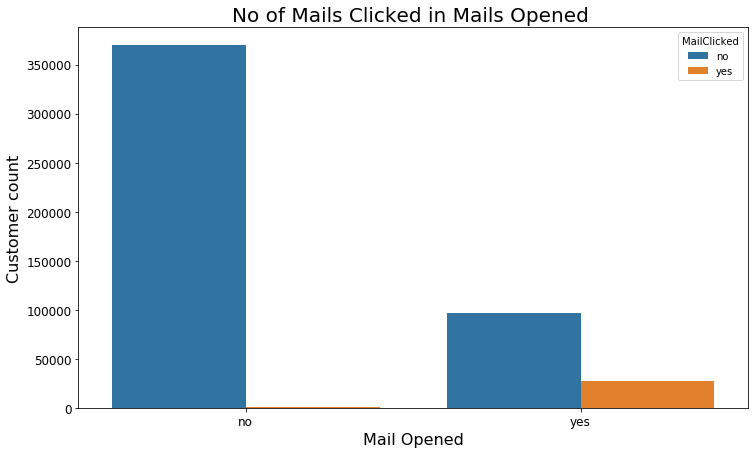

In [102]:
# if a person hasn't opened the mail, he definetly must not have clicked it.
# but the graph shows otherwise.
plt.figure(figsize=(12,7))
sns.barplot(x='MailOpened',y='CustomerID',hue='MailClicked',data=df3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Mail Opened', fontsize= 16)
plt.ylabel('Customer count', fontsize= 16)
plt.title('No of Mails Clicked in Mails Opened ', fontsize=20 )
plt.show()

In [103]:
# Since there are rows with mail clicked as yes where mail opened is no, selecting those rows and deleting them .
g=email_data.loc[email_data['MailOpened']=='no',:]
b=email_test.loc[email_test['MailOpened']=='no',:]

a = g.loc[g['MailClicked']=='yes',:]
c=b.loc[b['MailClicked']=='yes',:]

In [104]:
email_data.drop(a.index, inplace=True)  
email_test.drop(c.index, inplace=True) 

### Converting timestamp to datetime

In [105]:
email_data['timestamp'] = pd.to_datetime(email_data['timestamp'])
email_test['timestamp'] = pd.to_datetime(email_test['timestamp'])

### Creating a new column 'MailHour' which is rounded off to hours 

In [106]:
email_data = email_data.assign(time=email_data['timestamp'].dt.round('H'))
email_test = email_test.assign(time=email_test['timestamp'].dt.round('H'))

In [107]:
# extracting hours from time column.
email_data['MailHours'] = email_data.time.dt.hour
email_test['MailHours'] = email_test.time.dt.hour

In [108]:
# dropping timestamp amd time.
email_data.drop(['timestamp','time'],axis=1,inplace=True)
email_test.drop(['timestamp','time'],axis=1,inplace=True)

In [109]:
email_data.head()

,CustomerID,DateOfemail,MailOpened,MailClicked,Mailcount,MailDay,MailHours
23820,C16368,2013-05-20,yes,no,29,Monday,15
23821,C16368,2013-02-05,yes,no,29,Tuesday,14
23822,C16368,2012-11-26,yes,no,29,Monday,11
23823,C16368,2013-05-30,yes,no,29,Thursday,14
23824,C16368,2013-05-18,yes,no,29,Saturday,10


### 'MailHours' Vs 'MailClicked'

In [110]:
df4=email_data.groupby(['MailHours','MailClicked']).count().reset_index()
df4.head(3)

,MailHours,MailClicked,CustomerID,DateOfemail,MailOpened,Mailcount,MailDay
0,10,no,28332,28332,28332,28332,28332
1,10,yes,1641,1641,1641,1641,1641
2,11,no,58347,58347,58347,58347,58347


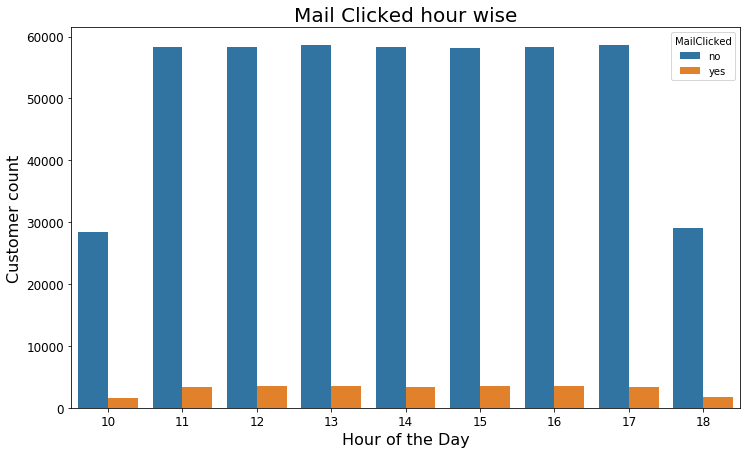

In [111]:
plt.figure(figsize=(12,7))
sns.barplot(x='MailHours',y='CustomerID',hue='MailClicked',data=df4)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Hour of the Day', fontsize= 16)
plt.ylabel('Customer count', fontsize= 16)
plt.title('Mail Clicked hour wise', fontsize=20 )
plt.show()

### 'MailHours' Vs 'MailOpened'

In [112]:
df5=email_data.groupby(['MailHours','MailOpened']).count().reset_index()
df5.head(3)

,MailHours,MailOpened,CustomerID,DateOfemail,MailClicked,Mailcount,MailDay
0,10,no,22480,22480,22480,22480,22480
1,10,yes,7493,7493,7493,7493,7493
2,11,no,46255,46255,46255,46255,46255


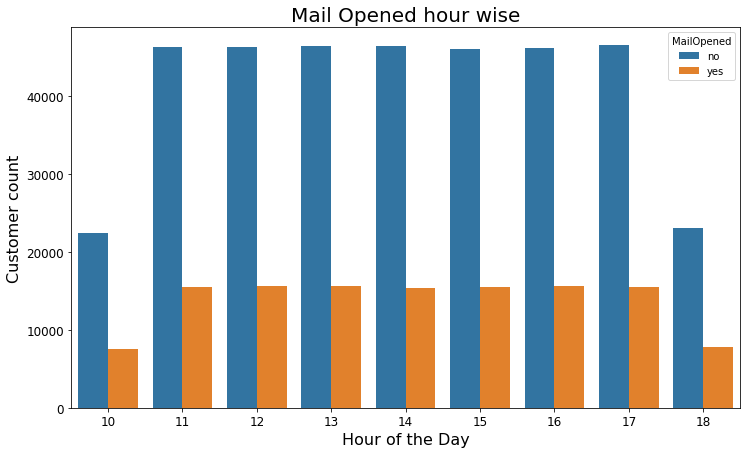

In [113]:
plt.figure(figsize=(12,7))
sns.barplot(x='MailHours',y='CustomerID',hue='MailOpened',data=df5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Hour of the Day', fontsize= 16)
plt.ylabel('Customer count', fontsize= 16)
plt.title('Mail Opened hour wise', fontsize=20 )
plt.show()

### Extracting Year and Month from DateOfemail

In [114]:
email_data['Year'] = email_data['DateOfemail'].map(lambda x: x.year )
email_test['Year'] = email_test['DateOfemail'].map(lambda x: x.year )

In [115]:
email_data['Month'] = email_data['DateOfemail'].map(lambda x: x.month )
email_test['Month'] = email_test['DateOfemail'].map(lambda x: x.month )

Text(0.5, 0, 'Year')

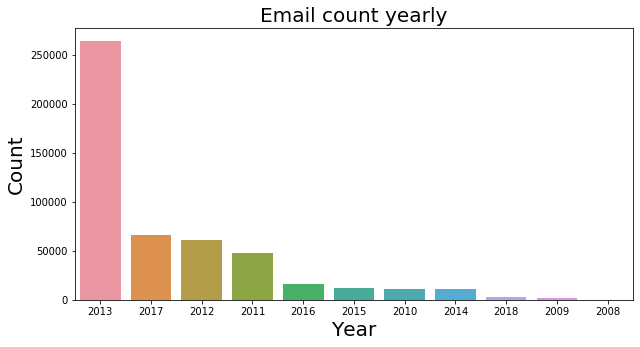

In [116]:
# More no of emails sent in the year 2013
%matplotlib inline
plt.figure(figsize=(10,5))
sns.countplot(x = email_data.Year, \
              order = email_data.Year.value_counts().iloc[:].index, \
                                                      orient = 'v')
plt.title('Email count yearly', fontsize=20 )
plt.ylabel('Count', fontsize = 20)
plt.xlabel('Year', fontsize = 20)

Text(0.5, 0, 'Month')

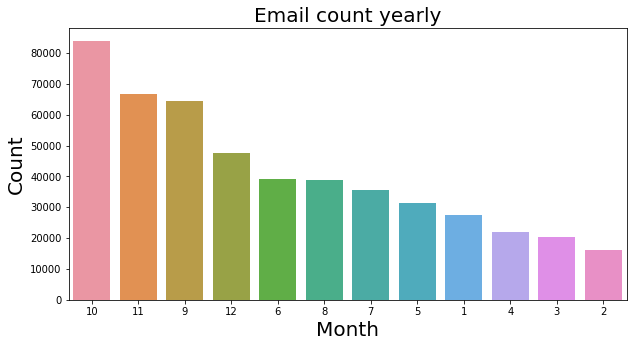

In [117]:
# More no of emails sent in the last 4 months
%matplotlib inline
plt.figure(figsize=(10,5))
sns.countplot(x = email_data.Month, \
              order = email_data.Month.value_counts().iloc[:].index, \
                                                      orient = 'v')
plt.title('Email count yearly', fontsize=20 )
plt.ylabel('Count', fontsize = 20)
plt.xlabel('Month', fontsize = 20)

In [118]:
# Dropping Month
email_data.drop(['Month','Year'], axis=1,inplace=True)
email_test.drop(['Month','Year'], axis=1,inplace=True)

### Creating new columns

In [119]:
# dataframes with values in MailOpened as 'yes'
data1=email_data.drop(email_data[email_data['MailOpened']=='no'].index)  
data2=email_test.drop(email_test[email_test['MailOpened']=='no'].index) 

In [120]:
# creating a column 'Mailsopened', which gives the no of mails opened
email_data['MailsOpened'] = data1.groupby('CustomerID')['MailOpened'].transform('count')
email_test['MailsOpened'] = data2.groupby('CustomerID')['MailOpened'].transform('count')

### Most no of Mails opened on which day and which hour

In [121]:
email_data['MailDay'] = data1.groupby('CustomerID')['MailDay'].transform(lambda x: x.value_counts().idxmax())
email_test['MailDay'] = data2.groupby('CustomerID')['MailDay'].transform(lambda x: x.value_counts().idxmax())

In [122]:
email_data['MailHours'] = data1.groupby('CustomerID')['MailHours'].transform(lambda x: x.value_counts().idxmax())
email_test['MailHours'] = data2.groupby('CustomerID')['MailHours'].transform(lambda x: x.value_counts().idxmax())

In [123]:
# Dataframes with values in MailClicked as 'yes'
data3=email_data.drop(email_data[email_data['MailClicked']=='no'].index)  
data4=email_test.drop(email_test[email_test['MailClicked']=='no'].index)  

In [124]:
# creating a column 'MailsClicked' with count of mails clicked by a customer
email_data['MailsClicked'] = data3.groupby('CustomerID')['MailClicked'].transform('count')
email_test['MailsClicked'] = data4.groupby('CustomerID')['MailClicked'].transform('count')

In [125]:
# dropping 'MailOpened' and 'MailClicked'
email_data.drop(['MailOpened','MailClicked'],axis=1,inplace=True)
email_test.drop(['MailOpened','MailClicked'],axis=1,inplace=True)

### Dropping duplicates if exist.

In [126]:
email_data.drop_duplicates(subset=['CustomerID','MailsOpened','MailsClicked','Mailcount','MailDay','MailHours'], keep='first', inplace=True)
email_test.drop_duplicates(subset=['CustomerID','MailsOpened','MailsClicked','Mailcount','MailDay','MailHours'], keep='first', inplace=True)

In [127]:
print (email_data.shape)
print(email_test.shape)

(33680, 7)
(8365, 7)


### Checking null values

In [128]:
email_data.isnull().sum()

CustomerID          0
DateOfemail         0
Mailcount           0
MailDay         13617
MailHours       13617
MailsOpened     13617
MailsClicked    25373
dtype: int64

In [129]:
email_test.isnull().sum()

CustomerID         0
DateOfemail        0
Mailcount          0
MailDay         3376
MailHours       3376
MailsOpened     3376
MailsClicked    6281
dtype: int64

### Dealing with null values

In [130]:
email_data['MailsOpened']= email_data.groupby("CustomerID")['MailsOpened'].transform(lambda x: x.fillna(x.mean()))
email_data['MailsOpened']= email_data.groupby("CustomerID")['MailsOpened'].transform(lambda x: x.fillna(0))

In [131]:
email_test['MailsOpened']= email_test.groupby("CustomerID")['MailsOpened'].transform(lambda x: x.fillna(x.mean()))
email_test['MailsOpened']= email_test.groupby("CustomerID")['MailsOpened'].transform(lambda x: x.fillna(0))

In [132]:
email_data['MailsClicked']= email_data.groupby("CustomerID")['MailsClicked'].transform(lambda x: x.fillna(x.mean()))
email_data['MailsClicked']= email_data.groupby("CustomerID")['MailsClicked'].transform(lambda x: x.fillna(0))

In [133]:
email_test['MailsClicked']= email_test.groupby("CustomerID")['MailsClicked'].transform(lambda x: x.fillna(x.mean()))
email_test['MailsClicked']= email_test.groupby("CustomerID")['MailsClicked'].transform(lambda x: x.fillna(0))

In [134]:
email_data['MailHours']= email_data.groupby("CustomerID")['MailHours'].transform(lambda x: x.fillna(x.mean()))
email_data['MailHours']= email_data.groupby("CustomerID")['MailHours'].transform(lambda x: x.fillna(0))

In [135]:
email_test['MailHours']= email_test.groupby("CustomerID")['MailHours'].transform(lambda x: x.fillna(x.mean()))
email_test['MailHours']= email_test.groupby("CustomerID")['MailHours'].transform(lambda x: x.fillna(0))

In [136]:
email_data['MailDay']= email_data.groupby("CustomerID")['MailDay'].transform(lambda x: x.fillna(method='ffill'))
email_test['MailDay']= email_test.groupby("CustomerID")['MailDay'].transform(lambda x: x.fillna(method='ffill'))

In [137]:
email_data['MailDay']= email_data.groupby("CustomerID")['MailDay'].transform(lambda x: x.fillna(method='backfill'))
email_test['MailDay']= email_test.groupby("CustomerID")['MailDay'].transform(lambda x: x.fillna(method='backfill'))

In [138]:
email_data['MailDay']= email_data.groupby("CustomerID")['MailDay'].transform(lambda x: x.fillna('Nil'))
email_test['MailDay']= email_test.groupby("CustomerID")['MailDay'].transform(lambda x: x.fillna('Nil'))

In [139]:
email_data.isnull().sum()

CustomerID      0
DateOfemail     0
Mailcount       0
MailDay         0
MailHours       0
MailsOpened     0
MailsClicked    0
dtype: int64

In [140]:
email_test.isnull().sum()

CustomerID      0
DateOfemail     0
Mailcount       0
MailDay         0
MailHours       0
MailsOpened     0
MailsClicked    0
dtype: int64

### Dropping remaining duplicates 

In [141]:
email_data.drop_duplicates(subset=['CustomerID','MailsOpened','MailDay','MailHours','MailsClicked','Mailcount'], keep='first', inplace=True)
email_test.drop_duplicates(subset=['CustomerID','MailsOpened','MailDay','MailHours','MailsClicked','Mailcount'], keep='first', inplace=True)

In [142]:
print(email_data.shape)
print (email_test.shape)

(14111, 7)
(3498, 7)


### Distribution of 'Mail count', 'MailsOpened' and 'MailsClicked'

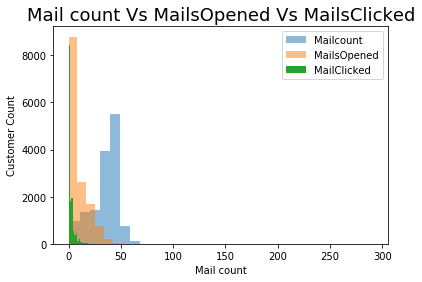

In [143]:
plt.hist(email_data.Mailcount,bins=30,alpha=0.5,label='Mailcount')
plt.hist(email_data.MailsOpened,bins=30,alpha=0.5,label='MailsOpened')
plt.hist(email_data.MailsClicked,bins=30,alpha=1,label='MailClicked')
plt.xlabel('Mail count')
plt.ylabel('Customer Count')
plt.title('Mail count Vs MailsOpened Vs MailsClicked',fontsize=18)
plt.legend(loc='upper right')
plt.show()

### Mergeing email_data and target_data

In [144]:
merge_data2=pd.merge(email_data, target_data, on='CustomerID', how='outer')

In [145]:
merge_data2.shape

(23820, 8)

In [146]:
merge_data2.isnull().sum()

CustomerID               0
DateOfemail           9709
Mailcount             9709
MailDay               9709
MailHours             9709
MailsOpened           9709
MailsClicked          9709
RetentionPotential       0
dtype: int64

In [147]:
merge_data2.head()

,CustomerID,DateOfemail,Mailcount,MailDay,MailHours,MailsOpened,MailsClicked,RetentionPotential
0,C16368,2013-05-20,29.0,Monday,13.0,29.0,1.0,High
1,C20345,2013-08-16,95.0,Saturday,14.0,88.0,10.0,Low
2,C18647,2011-06-01,30.0,Monday,16.0,27.0,4.0,Low
3,C36692,2013-05-25,64.0,Friday,16.0,18.0,10.0,Low
4,C13831,2011-10-05,34.0,Thursday,13.0,32.0,3.0,Low


### 'MailDay' Vs 'RetentionPotential'

In [148]:
df6= merge_data2.groupby(['MailDay','RetentionPotential']).count().reset_index()

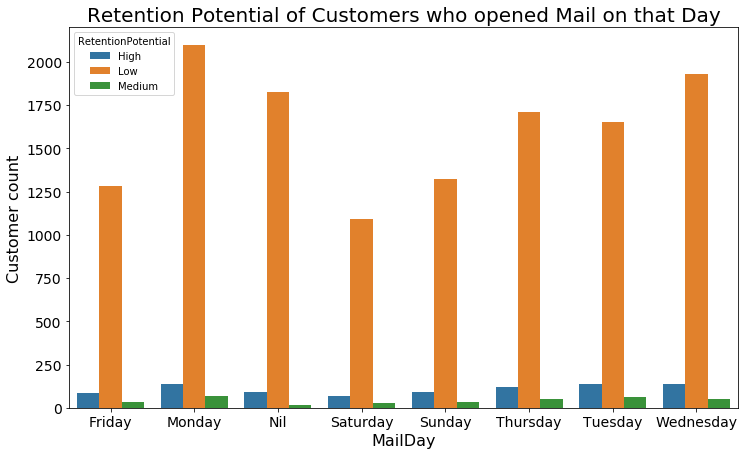

In [149]:
%matplotlib inline
plt.figure(figsize=(12,7))
sns.barplot(x='MailDay',y='CustomerID',hue='RetentionPotential',data=df6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('MailDay', fontsize= 16)
plt.ylabel('Customer count', fontsize= 16)
plt.title('Retention Potential of Customers who opened Mail on that Day', fontsize=20 )
plt.show()

### 'MailHours' Vs 'RetentionPotential'

In [150]:
df7= merge_data2.groupby(['MailHours','RetentionPotential']).count().reset_index()

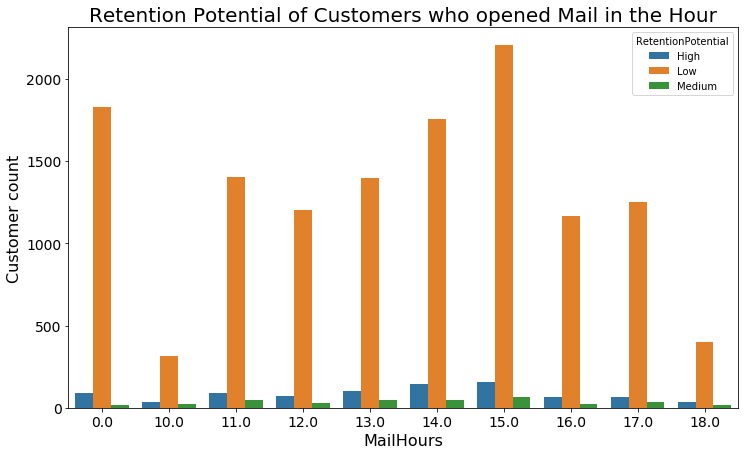

In [151]:
%matplotlib inline
plt.figure(figsize=(12,7))
sns.barplot(x='MailHours',y='CustomerID',hue='RetentionPotential',data=df7)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('MailHours', fontsize= 16)
plt.ylabel('Customer count', fontsize= 16)
plt.title('Retention Potential of Customers who opened Mail in the Hour', fontsize=20 )
plt.show()

### 'RetentionPotential' Vs 'MailsClicked'

In [152]:
df8= merge_data2.groupby(['RetentionPotential','MailsClicked']).count().reset_index()

In [153]:
df8.head(3)

,RetentionPotential,MailsClicked,CustomerID,DateOfemail,Mailcount,MailDay,MailHours,MailsOpened
0,High,0.0,508,508,508,508,508,508
1,High,1.0,208,208,208,208,208,208
2,High,2.0,95,95,95,95,95,95


C:\Users\Tejasvi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 <a list of 10 Text yticklabel objects>)

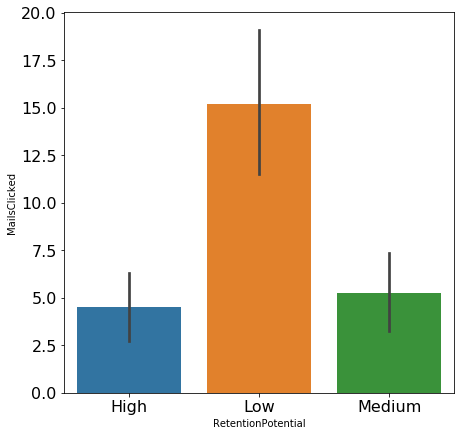

In [154]:
plt.figure(figsize=(7,7))
sns.barplot(x='RetentionPotential',y='MailsClicked',data=df8)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

## Customer Transactions Data

In [155]:
trans_data.head(2)

,CustomerID,DateOfOrder,timestamp,OrderQuantity
0,C16368,2013-08-11,15:17:52,15
1,C20345,2011-04-01,19:50:00,92


In [156]:
trans_test.head(2)

,CustomerID,DateOfOrder,timestamp,OrderQuantity
0,C17838,2011-03-28,17:41:08,55
1,C12403,2010-10-12,15:58:02,174


In [157]:
trans_data.describe()

,OrderQuantity
count,104755.000000
mean,81.319059
std,46.853569
min,0.000000
25%,50.000000
50%,71.000000
75%,100.000000
max,1501.000000


In [158]:
trans_test.describe()

,OrderQuantity
count,26768.000000
mean,84.407763
std,50.794616
min,1.000000
25%,51.000000
50%,73.000000
75%,102.000000
max,501.000000


In [159]:
inspect_data(trans_data)

,Data Type,No of Levels,Levels
CustomerID,object,23820,['C16368' 'C20345' 'C17683' ... 'C40967' 'C361...
DateOfOrder,object,3151,['2013-08-11' '2011-04-01' '2012-06-29' ... '2...
timestamp,object,21399,['15:17:52' '19:50:00' '15:11:56' ... '13:56:4...
OrderQuantity,int64,451,[15 92 95 74 81 78 83 86 85 93 90 84 66 106 88...


In [160]:
inspect_data(trans_test)

,Data Type,No of Levels,Levels
CustomerID,object,5955,['C17838' 'C12403' 'C19041' ... 'C38741' 'C204...
DateOfOrder,object,2771,['2011-03-28' '2010-10-12' '2010-11-27' ... '2...
timestamp,object,15326,['17:41:08' '15:58:02' '20:13:48' ... '10:07:4...
OrderQuantity,int64,372,[55 174 171 166 179 163 160 164 175 159 176 16...


## Exploratory Data Analysis of Transactions data

In [161]:
print(trans_data['DateOfOrder'][trans_data['DateOfOrder']> today].count())
print(trans_test['DateOfOrder'][trans_test['DateOfOrder']> today].count())

0
0


### Checking for Quantity= 0

In [162]:
print(trans_data['OrderQuantity'][trans_data['OrderQuantity']== 0].count())
print(trans_test['OrderQuantity'][trans_test['OrderQuantity']== 0].count())

12
0


In [163]:
# same customerID ordered 0 quantity. which can be removed.
trans_data.loc[trans_data['OrderQuantity']== 0,:]

,CustomerID,DateOfOrder,timestamp,OrderQuantity
64155,C15837,2010-08-04,11:54:48,0
64156,C15837,2010-08-13,11:01:08,0
64157,C15837,2010-08-12,12:23:18,0
64158,C15837,2010-09-27,18:10:54,0
64159,C15837,2010-08-17,17:49:00,0
64160,C15837,2010-09-17,19:16:56,0
64161,C15837,2010-08-11,19:36:24,0
64162,C15837,2010-08-26,18:34:46,0
64163,C15837,2010-08-14,12:07:30,0
64164,C15837,2010-08-06,13:22:34,0


In [164]:
# this customerID has not bought anything.
trans_data.loc[trans_data['CustomerID']== 'C15837',:]

,CustomerID,DateOfOrder,timestamp,OrderQuantity
64155,C15837,2010-08-04,11:54:48,0
64156,C15837,2010-08-13,11:01:08,0
64157,C15837,2010-08-12,12:23:18,0
64158,C15837,2010-09-27,18:10:54,0
64159,C15837,2010-08-17,17:49:00,0
64160,C15837,2010-09-17,19:16:56,0
64161,C15837,2010-08-11,19:36:24,0
64162,C15837,2010-08-26,18:34:46,0
64163,C15837,2010-08-14,12:07:30,0
64164,C15837,2010-08-06,13:22:34,0


In [165]:
# dropping rowa with quantity = 0 
trans_data.drop(trans_data[trans_data['OrderQuantity']== 0].index, inplace=True)  # Axis = 0 for rows

### Duplicates check

In [166]:
trans_data.drop_duplicates(subset=['CustomerID','DateOfOrder','timestamp','OrderQuantity'], keep='first', inplace=True)
trans_test.drop_duplicates(subset=['CustomerID','DateOfOrder','timestamp','OrderQuantity'], keep='first', inplace=True)

In [167]:
print(trans_data.shape)
print(trans_test.shape)

(104743, 4)
(26768, 4)


### Creating new columns for Visualizations

In [168]:
# no of orders each customer has made
trans_data['OrderCount'] = trans_data.groupby('CustomerID')['CustomerID'].transform('count')
trans_test['OrderCount'] = trans_test.groupby('CustomerID')['CustomerID'].transform('count')

In [169]:
# converting 'DateOfOrder' to datetime
trans_data['DateOfOrder'] = pd.to_datetime(trans_data['DateOfOrder'])
trans_test['DateOfOrder'] = pd.to_datetime(trans_test['DateOfOrder'])

In [170]:
# Rounding off hours to the nearest minute. 
trans_data['timestamp'] = pd.to_datetime(trans_data['timestamp'])
trans_data = trans_data.assign(time=trans_data['timestamp'].dt.round('H'))

In [171]:
trans_test['timestamp'] = pd.to_datetime(trans_test['timestamp'])
trans_test = trans_test.assign(time=trans_test['timestamp'].dt.round('H'))

In [172]:
# Extracting hour from time.
trans_data['Orderhour'] = trans_data.time.dt.hour
trans_data.drop(['timestamp','time'],axis=1,inplace=True)

In [173]:
trans_test['Orderhour'] = trans_test.time.dt.hour
trans_test.drop(['timestamp','time'],axis=1,inplace=True)

In [174]:
# Extracting Year and Month for visualization
trans_data['Year'] = trans_data['DateOfOrder'].map(lambda x: x.year )
trans_test['Year'] = trans_test['DateOfOrder'].map(lambda x: x.year )

In [175]:
trans_data['Month'] = trans_data['DateOfOrder'].map(lambda x: x.month )
trans_test['Month'] = trans_test['DateOfOrder'].map(lambda x: x.month )

Text(0.5, 0, 'Orders Yearly')

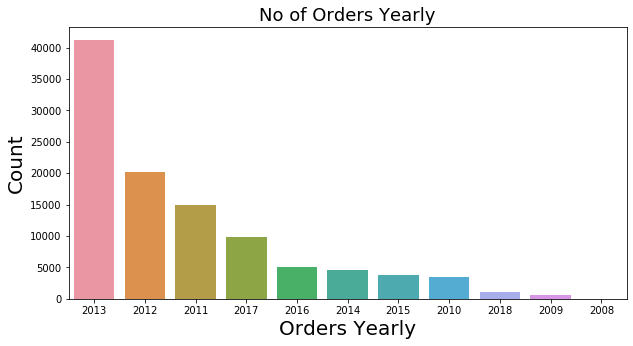

In [176]:
# More Orders in the year 2013
%matplotlib inline
plt.figure(figsize=(10,5))
sns.countplot(x = trans_data.Year, \
              order = trans_data.Year.value_counts().iloc[:].index, \
                                                      orient = 'v')
plt.title('No of Orders Yearly',fontsize=18)
plt.ylabel('Count', fontsize = 20)
plt.xlabel('Orders Yearly', fontsize = 20)

Text(0.5, 0, 'Month')

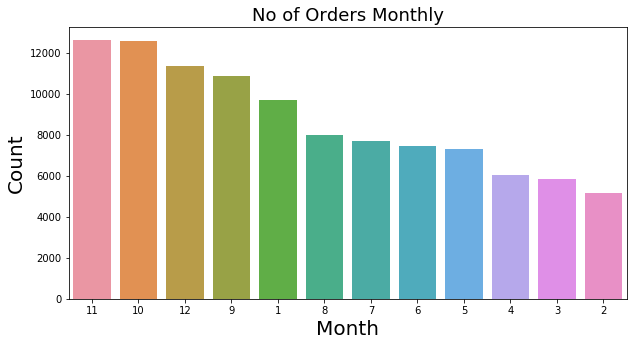

In [177]:
# orders are maximun in the last four months of a year.
%matplotlib inline
plt.figure(figsize=(10,5))
sns.countplot(x = trans_data.Month, \
              order = trans_data.Month.value_counts().iloc[:].index, \
                                                      orient = 'v')
plt.title('No of Orders Monthly',fontsize=18)
plt.ylabel('Count', fontsize = 20)
plt.xlabel('Month', fontsize = 20)

In [178]:
# Extracting the Day of order from 'DateOfOrder'.
trans_data=trans_data.assign(OrderDay=trans_data['DateOfOrder'].dt.weekday_name)
trans_test=trans_test.assign(OrderDay=trans_test['DateOfOrder'].dt.weekday_name)

Text(0.5, 0, 'OrderDay')

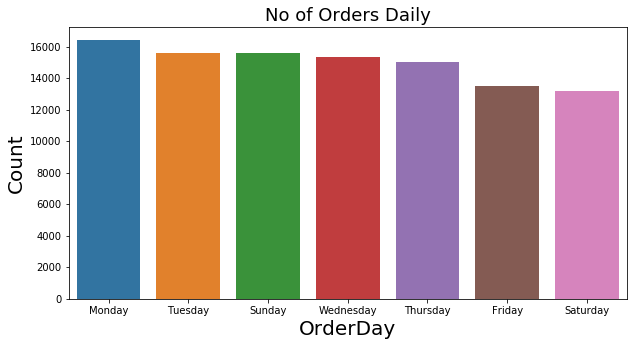

In [179]:
%matplotlib inline
plt.figure(figsize=(10,5))
sns.countplot(x = trans_data.OrderDay, \
              order = trans_data.OrderDay.value_counts().iloc[:].index, \
                                                      orient = 'v')
plt.title('No of Orders Daily',fontsize=18)
plt.ylabel('Count', fontsize = 20)
plt.xlabel('OrderDay', fontsize = 20)

Text(0.5, 0, 'OrderHour')

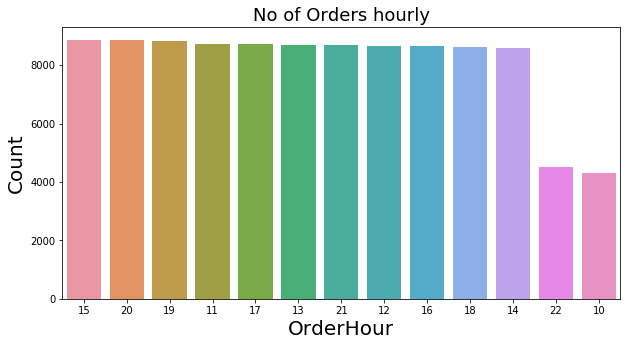

In [180]:
%matplotlib inline
plt.figure(figsize=(10,5))
sns.countplot(x = trans_data.Orderhour, \
              order = trans_data.Orderhour.value_counts().iloc[:].index, \
                                                      orient = 'v')
plt.title('No of Orders hourly',fontsize=18)
plt.ylabel('Count', fontsize = 20)
plt.xlabel('OrderHour', fontsize = 20)

In [181]:
# dropping these columns.
trans_data.drop(['Year','Month'],axis=1,inplace=True)
trans_test.drop(['Year','Month'],axis=1,inplace=True)

### Fearture Extraction

In [182]:
# creating a column 'lastOrder' with gives us the no of months it has been since the last order was placed.
order_last= trans_data.groupby('CustomerID').DateOfOrder.max()
order_first= trans_data.groupby('CustomerID').DateOfOrder.min()

In [183]:
order_last1= trans_test.groupby('CustomerID').DateOfOrder.max()
order_first1= trans_test.groupby('CustomerID').DateOfOrder.min()

In [184]:
train_dates= pd.DataFrame({'CustomerID':order_last.index, 'LastOrder':order_last.values,'FirstOrder':order_first.values})
test_dates= pd.DataFrame({'CustomerID':order_last1.index, 'LastOrder':order_last1.values,'FirstOrder':order_first1.values})

In [185]:
trans_data=pd.merge(trans_data, train_dates, on='CustomerID', how='outer')
trans_test=pd.merge(trans_test, test_dates, on='CustomerID', how='outer')

In [186]:
# creating a column active period. No. of days the customer was active from the time of 1st order to last order.
trans_data['Active period']= trans_data['LastOrder'] - trans_data['FirstOrder']
trans_test['Active period']= trans_test['LastOrder'] - trans_test['FirstOrder']

In [187]:
# Creating 'LastOrder' column which is the no. of months since the last order.
from datetime import datetime
trans_data['LastOrder'] = ((datetime.now() - trans_data['LastOrder']) / np.timedelta64(1, 'M')).astype(int)
trans_test['LastOrder'] = ((datetime.now() - trans_test['LastOrder']) / np.timedelta64(1, 'M')).astype(int)

In [188]:
trans_data['Active period']=(trans_data['Active period'] / np.timedelta64(1, 'D')).astype(int)
trans_test['Active period']=(trans_test['Active period'] /np.timedelta64(1, 'D')).astype(int)

In [189]:
trans_data.drop(['FirstOrder'],axis=1,inplace=True)
trans_test.drop(['FirstOrder'],axis=1,inplace=True)

In [190]:
trans_data.head()

,CustomerID,DateOfOrder,OrderQuantity,OrderCount,Orderhour,OrderDay,LastOrder,Active period
0,C16368,2013-08-11,15,1,15,Sunday,82,0
1,C20345,2011-04-01,92,186,20,Friday,77,1024
2,C20345,2012-06-29,95,186,15,Friday,77,1024
3,C20345,2012-09-22,74,186,21,Saturday,77,1024
4,C20345,2011-08-23,81,186,12,Tuesday,77,1024


### Crunching columns to have unique customerID

In [191]:
trans_data['OrderQuantity'] = trans_data.groupby('CustomerID')['OrderQuantity'].transform('sum')
trans_test['OrderQuantity'] = trans_test.groupby('CustomerID')['OrderQuantity'].transform('sum')

In [192]:
trans_data['OrderDay']=trans_data.groupby('CustomerID')['OrderDay'].transform(lambda x: x.value_counts().idxmax())
trans_data['Orderhour']=trans_data.groupby('CustomerID')['Orderhour'].transform(lambda x: x.value_counts().idxmax())

In [193]:
trans_test['OrderDay']=trans_test.groupby('CustomerID')['OrderDay'].transform(lambda x: x.value_counts().idxmax())
trans_test['Orderhour']=trans_test.groupby('CustomerID')['Orderhour'].transform(lambda x: x.value_counts().idxmax())

In [194]:
trans_data.head()

,CustomerID,DateOfOrder,OrderQuantity,OrderCount,Orderhour,OrderDay,LastOrder,Active period
0,C16368,2013-08-11,15,1,15,Sunday,82,0
1,C20345,2011-04-01,15614,186,17,Saturday,77,1024
2,C20345,2012-06-29,15614,186,17,Saturday,77,1024
3,C20345,2012-09-22,15614,186,17,Saturday,77,1024
4,C20345,2011-08-23,15614,186,17,Saturday,77,1024


In [195]:
trans_data.drop_duplicates(subset=['CustomerID','OrderQuantity','OrderCount','Orderhour','OrderDay','LastOrder','Active period'], keep='first', inplace=True)
trans_test.drop_duplicates(subset=['CustomerID','OrderQuantity','OrderCount','Orderhour','OrderDay','LastOrder','Active period'], keep='first', inplace=True)

In [196]:
print(trans_data.shape)
print(trans_test.shape)

(23819, 8)
(5955, 8)


Text(0.5, 0, 'orders daily')

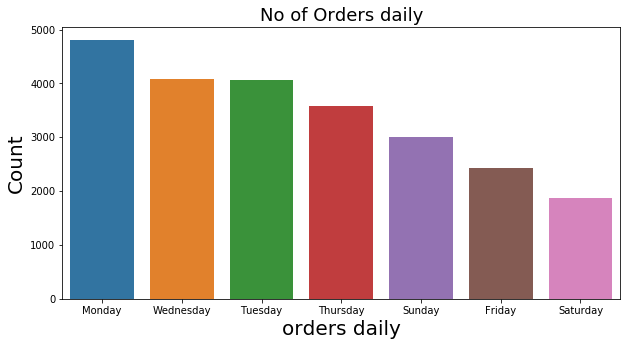

In [197]:
# more orders on Tuesday and Monday
%matplotlib inline
plt.figure(figsize=(10,5))
sns.countplot(x = trans_data.OrderDay, \
              order = trans_data.OrderDay.value_counts().iloc[:].index, \
                                                      orient = 'v')
plt.title('No of Orders daily',fontsize=18)
plt.ylabel('Count', fontsize = 20)
plt.xlabel('orders daily', fontsize = 20)

Text(0.5, 0, 'orders hourly')

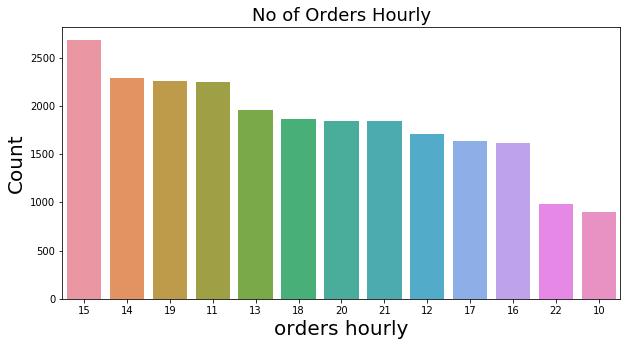

In [198]:
# more orders at 3pm
%matplotlib inline
plt.figure(figsize=(10,5))
sns.countplot(x = trans_data.Orderhour, \
              order = trans_data.Orderhour.value_counts().iloc[:].index, \
                                                      orient = 'v')
plt.title('No of Orders Hourly',fontsize=18)
plt.ylabel('Count', fontsize = 20)
plt.xlabel('orders hourly', fontsize = 20)

C:\Users\Tejasvi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Tejasvi\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


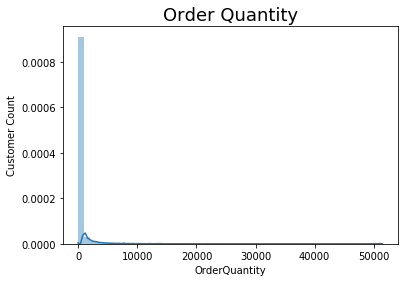

In [199]:
plt.xlabel("OrderQuantity")
plt.ylabel("Customer Count")
plt.title("Order Quantity",fontsize= 18)
sns.distplot(trans_data.OrderQuantity)
#plt.hist(trans_data.OrderQuantity, bins= 50)
plt.show()

C:\Users\Tejasvi\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


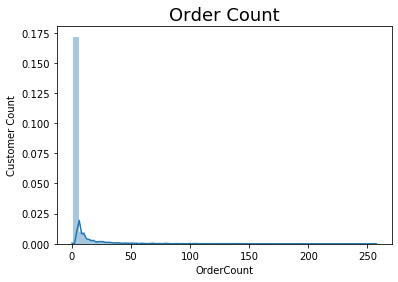

In [200]:
plt.xlabel("Ordercount")
plt.ylabel("Customer Count")
plt.title("Order Count",fontsize= 18)
sns.distplot(trans_data.OrderCount)
#plt.hist(trans_data.OrderQuantity, bins= 50)
plt.show()

In [201]:
trans_data.drop(['Orderhour','OrderDay'],axis=1,inplace=True)
trans_test.drop(['Orderhour','OrderDay'],axis=1,inplace=True)

### Merging transaction data with target data

In [202]:
merge_data3=pd.merge(target_data, trans_data, on='CustomerID', how='outer')

In [203]:
merge_data3.shape

(23820, 7)

In [204]:
merge_data3.head()

,CustomerID,RetentionPotential,DateOfOrder,OrderQuantity,OrderCount,LastOrder,Active period
0,C37869,Low,2011-07-27,982.0,8.0,81.0,764.0
1,C33841,Low,2013-12-23,43.0,1.0,77.0,0.0
2,C29464,Low,2010-05-24,51.0,1.0,120.0,0.0
3,C28158,Low,2017-06-19,60.0,1.0,36.0,0.0
4,C22785,High,2013-12-13,41.0,1.0,78.0,0.0


In [205]:
df1= merge_data3.groupby(['RetentionPotential','OrderCount']).count().reset_index()

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text yticklabel objects>)

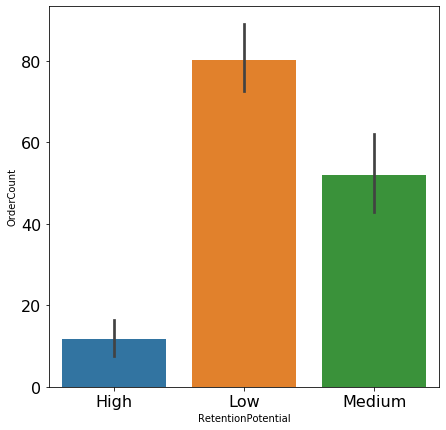

In [206]:
plt.figure(figsize=(7,7))
sns.barplot(x='RetentionPotential',y='OrderCount',data=df1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [207]:
high=merge_data3.loc[merge_data3['Active period']==0,:]

In [208]:
high['RetentionPotential'].value_counts()

Low       11843
High       3030
Medium       99
Name: RetentionPotential, dtype: int64

Text(0.5, 0, 'Retention Potential')

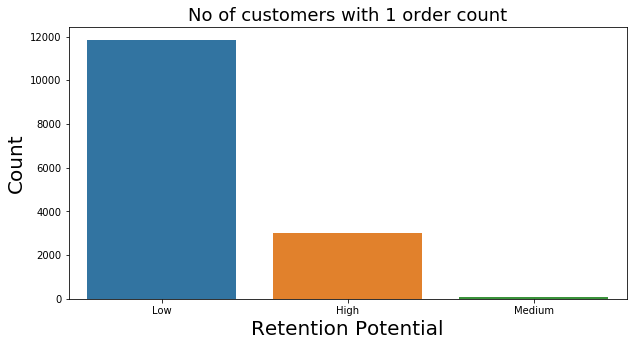

In [209]:
%matplotlib inline
plt.figure(figsize=(10,5))
sns.countplot(x = high.RetentionPotential, \
              order = high.RetentionPotential.value_counts().iloc[:].index, \
                                                      orient = 'v')
plt.title('No of customers with 1 order count',fontsize=18)
plt.ylabel('Count', fontsize = 20)
plt.xlabel('Retention Potential', fontsize = 20)

## Merging all the individual data sets

In [210]:
merge_data=pd.merge(merge_data1, email_data, on='CustomerID', how='outer')
merge_test=pd.merge(cust_test, email_test, on='CustomerID', how='outer')

In [211]:
merged_data=pd.merge(merge_data, trans_data, on='CustomerID', how='outer')
merged_test=pd.merge(merge_test, trans_test, on='CustomerID', how='outer')

In [212]:
print(merged_data.shape)
print(merged_test.shape)

(23820, 21)
(5955, 20)


### Dropping dates

In [213]:
merged_data.drop(['DateOfRegistration','DateOfOrder','DateOfemail'],axis=1,inplace=True)
merged_test.drop(['DateOfRegistration','DateOfOrder','DateOfemail'],axis=1,inplace=True)

In [214]:
merged_data.columns

Index(['CustomerID', 'City', 'OnlineCommunication', 'AutomaticRefill',
       'DoorstepDelivery', 'PreferredDeliveryDay', 'RetentionPotential',
       'RegMonth', 'Year', 'Mailcount', 'MailDay', 'MailHours', 'MailsOpened',
       'MailsClicked', 'OrderQuantity', 'OrderCount', 'LastOrder',
       'Active period'],
      dtype='object')

### Checking null values

In [215]:
merged_data.isnull().sum()

CustomerID                 0
City                       0
OnlineCommunication        0
AutomaticRefill            0
DoorstepDelivery           0
PreferredDeliveryDay       0
RetentionPotential         0
RegMonth                   0
Year                       0
Mailcount               9709
MailDay                 9709
MailHours               9709
MailsOpened             9709
MailsClicked            9709
OrderQuantity              1
OrderCount                 1
LastOrder                  1
Active period              1
dtype: int64

In [216]:
merged_data[merged_data.CustomerID == 'C15837']

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,RetentionPotential,RegMonth,Year,Mailcount,MailDay,MailHours,MailsOpened,MailsClicked,OrderQuantity,OrderCount,LastOrder,Active period
8172,C15837,CITY2,0,0,0,Thursday,Low,6,2009,18.0,Nil,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [217]:
# dropping this customer who has many null values along with Quantity as zero
merged_data.drop(merged_data[merged_data.CustomerID == 'C15837'].index, inplace= True)

In [218]:
merged_data['MailsOpened']= merged_data.MailsOpened.fillna(0)
merged_data['Mailcount']= merged_data.Mailcount.fillna(0)
merged_data['MailsClicked']= merged_data.MailsClicked.fillna(0)
merged_data['MailHours']= merged_data.MailHours.fillna(0)
merged_data['MailDay']= merged_data.MailDay.fillna('Nil')

In [219]:
merged_test['MailsOpened']= merged_test.MailsOpened.fillna(0)
merged_test['Mailcount']= merged_test.Mailcount.fillna(0)
merged_test['MailsClicked']= merged_test.MailsClicked.fillna(0)
merged_test['MailHours']= merged_test.MailHours.fillna(0)
merged_test['MailDay']= merged_test.MailDay.fillna('Nil')

In [220]:
merged_test.isnull().sum()

CustomerID              0
City                    0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
RegMonth                0
Year                    0
Mailcount               0
MailDay                 0
MailHours               0
MailsOpened             0
MailsClicked            0
OrderQuantity           0
OrderCount              0
LastOrder               0
Active period           0
dtype: int64

### Changing data types

In [221]:
merged_data.dtypes

CustomerID               object
City                     object
OnlineCommunication       int64
AutomaticRefill           int64
DoorstepDelivery          int64
PreferredDeliveryDay     object
RetentionPotential       object
RegMonth                  int64
Year                      int64
Mailcount               float64
MailDay                  object
MailHours               float64
MailsOpened             float64
MailsClicked            float64
OrderQuantity           float64
OrderCount              float64
LastOrder               float64
Active period           float64
dtype: object

In [222]:
cat = merged_data[['CustomerID','City','OnlineCommunication','AutomaticRefill',\
                   'RetentionPotential','RegMonth','Year','DoorstepDelivery','PreferredDeliveryDay',\
                   'MailDay','MailHours']]
for col in cat:
    merged_data[col]= merged_data[col].astype('category')

In [223]:
num = merged_data[['OrderCount','OrderQuantity','Mailcount','MailsOpened','MailsClicked','LastOrder','Active period']]
for col in num:
    merged_data[col]= merged_data[col].astype('int16')

In [224]:
cat1 = merged_test[['CustomerID','City','OnlineCommunication','AutomaticRefill',\
                   'RegMonth','Year','DoorstepDelivery','PreferredDeliveryDay',\
                   'MailDay','MailHours']]
for col in cat1:
    merged_test[col]= merged_test[col].astype('category')

In [225]:
for col in num:
    merged_test[col]= merged_test[col].astype('int16')

### Data Inspection

In [226]:
inspect_data(merged_data)

,Data Type,No of Levels,Levels
CustomerID,category,23819,"[C16368, C20345, C17683, C18647, C36692, ..., ..."
City,category,4,"[CITY2, CITY4, CITY3, CITY1]\nCategories (4, o..."
OnlineCommunication,category,2,"[0, 1]\nCategories (2, int64): [0, 1]"
AutomaticRefill,category,2,"[0, 1]\nCategories (2, int64): [0, 1]"
DoorstepDelivery,category,2,"[0, 1]\nCategories (2, int64): [0, 1]"
PreferredDeliveryDay,category,7,"[Monday, Friday, Wednesday, Tuesday, Thursday,..."
RetentionPotential,category,3,"[High, Low, Medium]\nCategories (3, object): [..."
RegMonth,category,12,"[9, 12, 10, 11, 7, ..., 8, 2, 1, 5, 6]\nLength..."
Year,category,11,"[2012, 2010, 2009, 2011, 2008, ..., 2014, 2015..."
Mailcount,int16,84,[ 29 95 0 30 64 34 48 40 69 38 16 ...


In [227]:
inspect_data(merged_test)

,Data Type,No of Levels,Levels
CustomerID,category,5955,"[C17838, C12403, C19041, C24069, C26718, ..., ..."
City,category,4,"[CITY4, CITY2, CITY3, CITY1]\nCategories (4, o..."
OnlineCommunication,category,2,"[0, 1]\nCategories (2, int64): [0, 1]"
AutomaticRefill,category,2,"[0, 1]\nCategories (2, int64): [0, 1]"
DoorstepDelivery,category,2,"[0, 1]\nCategories (2, int64): [0, 1]"
PreferredDeliveryDay,category,7,"[Thursday, Wednesday, Friday, Monday, Tuesday,..."
RegMonth,category,12,"[10, 11, 1, 9, 4, ..., 8, 6, 5, 12, 3]\nLength..."
Year,category,11,"[2010, 2008, 2011, 2009, 2013, ..., 2014, 2015..."
Mailcount,int16,76,[ 0 46 60 45 13 31 40 16 18 47 38 ...
MailDay,category,8,"[Nil, Tuesday, Saturday, Thursday, Friday, Mon..."


In [228]:
# around 5300 customers with this condition. 
# out of which 235 customers are of High retention potential.
# A customer has registered with his email id and might not have checked for online communication and even then the retailers
# send him mails depending on this purchases and offers he might be interested in.
biased_data= merged_data[(merged_data['OnlineCommunication'] == 0) & (merged_data['Mailcount'] > 0)]

Text(0.5, 0, 'Retention Potential')

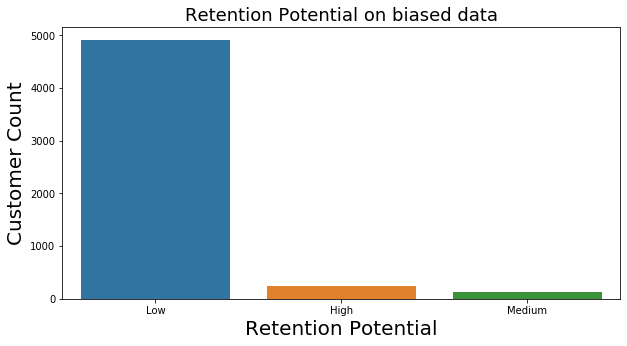

In [229]:
# Retention Potential on data with Online communications as 0 but have mail count
%matplotlib inline
plt.figure(figsize=(10,5))
sns.countplot(x = biased_data.RetentionPotential, \
              order = biased_data.RetentionPotential.value_counts().iloc[:].index, \
                                                      orient = 'v')
plt.title('Retention Potential on biased data',fontsize=18)
plt.ylabel('Customer Count', fontsize = 20)
plt.xlabel('Retention Potential', fontsize = 20)

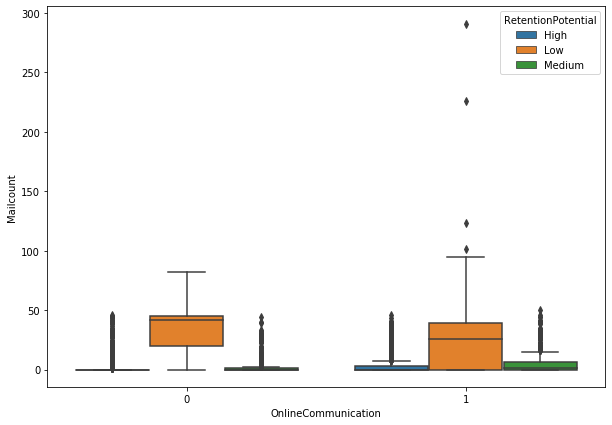

In [230]:
plt.figure(figsize=(10,7))
sns.boxplot(x='OnlineCommunication',y='Mailcount',hue='RetentionPotential',data=merged_data)

In [231]:
# 1312 customers in test data
merged_test[(merged_test['OnlineCommunication'] == 0) & (merged_test['Mailcount'] > 0)].shape

(1312, 17)

#### Ordercount of customers with AutomaticRefill as 1.

In [232]:
merged_data['AutomaticRefill'].value_counts() 

0    21563
1     2256
Name: AutomaticRefill, dtype: int64

In [233]:
df= merged_data[(merged_data['AutomaticRefill'] == 1)]

C:\Users\Tejasvi\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
C:\Users\Tejasvi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


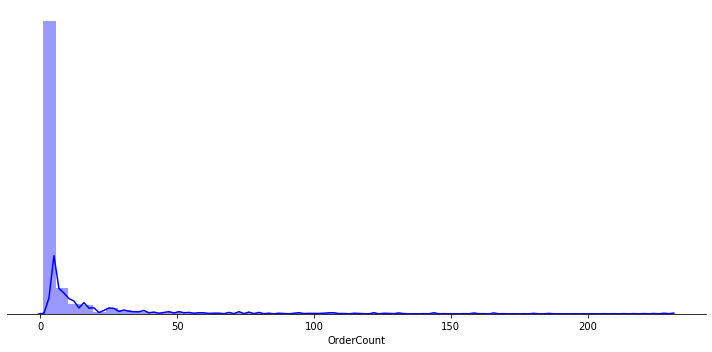

In [234]:
# distribution of order count for AutomaticRefill as 1.
%matplotlib inline
f, axes = plt.subplots(1, 1, figsize=(10, 5), sharex=True)
sns.despine(left=True)
sns.distplot(df['OrderCount'], bins = 50, color="b")
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

### Correlation in the Data

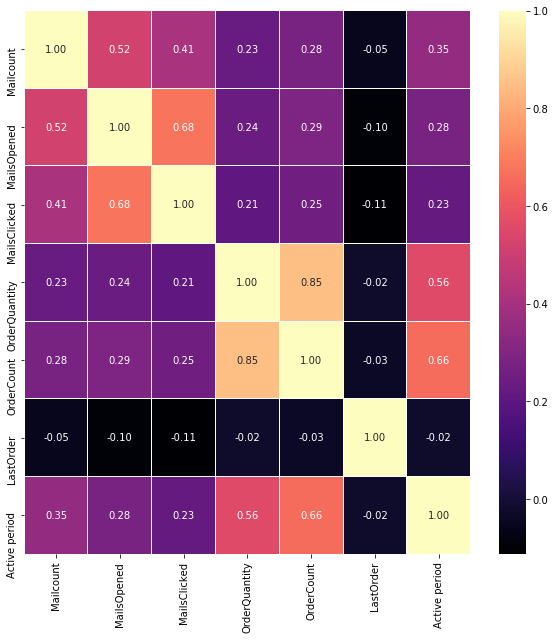

In [235]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(merged_data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

C:\Users\Tejasvi\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
C:\Users\Tejasvi\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


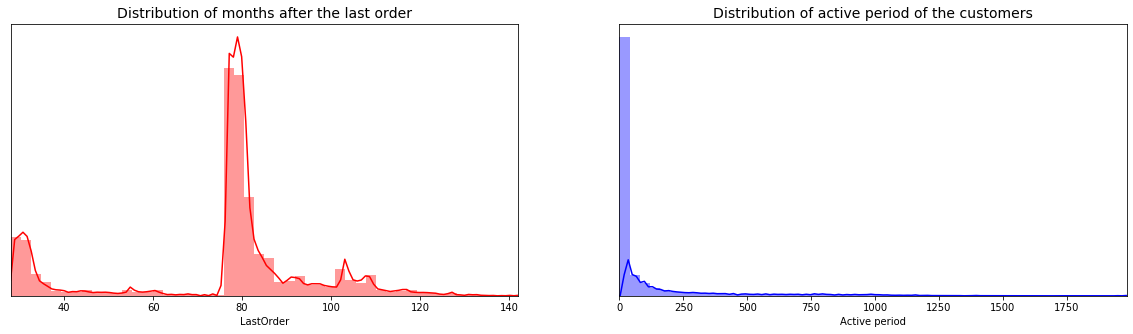

In [236]:
#%matplotlib inline
fig, ax = plt.subplots(ncols=2, figsize=(20,5))

lastorder = merged_data['LastOrder'].values
activeperiod = merged_data['Active period'].values

sns.distplot(merged_data['LastOrder'], ax=ax[0], color='r')
ax[0].set_title('Distribution of months after the last order', fontsize=14)
ax[0].set_xlim([min(lastorder), max(lastorder)])
plt.setp(ax[0], yticks=[])

sns.distplot(merged_data['Active period'], ax=ax[1], color='b')
ax[1].set_title('Distribution of active period of the customers', fontsize=14)
ax[1].set_xlim([min(activeperiod), max(activeperiod)])
plt.setp(ax[1], yticks=[])
plt.show()

## Decoupling

In [237]:
merged_data1= merged_data.drop(['CustomerID'] ,axis=1)

In [238]:
merged_test1= merged_test.drop(['CustomerID'], axis=1)

In [239]:
y = merged_data1['RetentionPotential']
print(y.shape)
X = merged_data1[merged_data1.columns.difference(['RetentionPotential'])]  ## Select all columns except "Amount"
print(X.shape)

(23819,)
(23819, 16)


In [240]:
num_attribute = X.select_dtypes(include='number').columns.tolist()

In [241]:
X.columns

Index(['Active period', 'AutomaticRefill', 'City', 'DoorstepDelivery',
       'LastOrder', 'MailDay', 'MailHours', 'Mailcount', 'MailsClicked',
       'MailsOpened', 'OnlineCommunication', 'OrderCount', 'OrderQuantity',
       'PreferredDeliveryDay', 'RegMonth', 'Year'],
      dtype='object')

In [242]:
merged_test1= merged_test1[['Active period', 'AutomaticRefill', 'City', 'DoorstepDelivery',
       'LastOrder', 'MailDay', 'MailHours', 'Mailcount', 'MailsClicked',
       'MailsOpened', 'OnlineCommunication', 'OrderCount', 'OrderQuantity',
       'PreferredDeliveryDay', 'RegMonth', 'Year']]

### Dummification

In [243]:
X = pd.get_dummies(X)
X.shape

(23819, 65)

In [244]:
merged_test1 = pd.get_dummies(merged_test1)
merged_test1.shape

(5955, 65)

### Standardization

In [245]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
standardizer.fit(X[num_attribute])
X[num_attribute] = standardizer.transform(X[num_attribute])

In [246]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
standardizer.fit(merged_test1[num_attribute])
merged_test1[num_attribute] = standardizer.transform(merged_test1[num_attribute])

### train validation split

In [247]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify = y)
print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_test',X_test.shape)
print('y_test',y_test.shape)

X_train (16673, 65)
y_train (16673,)
X_test (7146, 65)
y_test (7146,)


## Model Building

#### Defined metrics

In [248]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def train_metrics(y_train,train_pred):
    print("Train")
    print(accuracy_score(y_train,train_pred))
    print(confusion_matrix(y_train,train_pred))
    print(classification_report(y_train,train_pred))
    
def test_metrics(y_test,test_pred):
    print("Validation")
    print(accuracy_score(y_test,test_pred))
    print(confusion_matrix(y_test,test_pred))
    print(classification_report(y_test,test_pred))

#### Converting RetentionPotential levels to numeric and giving weights

In [249]:
Preds= {'High': 0, 'Medium':1,'Low':2}

y_train1= pd.DataFrame({'RetentionPotential':y_train.values})
y_train1.RetentionPotential =[Preds[item] for item in y_train1.RetentionPotential]

y_test1= pd.DataFrame({'RetentionPotential':y_test.values})
y_test1.RetentionPotential =[Preds[item] for item in y_test1.RetentionPotential]

In [250]:
Y_test=pd.Series(y_test1.RetentionPotential)
Y_train= pd.Series(y_train1.RetentionPotential)

In [251]:
weights = {'High': 0.625, 'Medium':3, 'Low': 0.125}
weights_train = pd.DataFrame({'weights':y_train.values})
weights_train.weights =[weights[item] for item in weights_train.weights]

weights_test = pd.DataFrame({'weights':y_test.values})
weights_test.weights =[weights[item] for item in weights_test.weights]

In [252]:
weightstrain=weights_train.weights.tolist()
weightstest=weights_test.weights.tolist()

### Logistic Regression

In [1605]:
from sklearn.linear_model import LogisticRegression

In [1606]:
lr = LogisticRegression(class_weight='balanced', solver='saga', penalty='l1')
model_log = lr.fit(X_train, y_train)
train_pred = model_log.predict(X_train)
test_pred = model_log.predict(X_test)

C:\Users\Tejasvi\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Tejasvi\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Tejasvi\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [1607]:
train_metrics(y_train,train_pred)
test_metrics(y_test,test_pred)

Train
0.8096923169195706
[[ 2268   271    90]
 [ 2343 10797   289]
 [  121    59   435]]
             precision    recall  f1-score   support

       High       0.48      0.86      0.62      2629
        Low       0.97      0.80      0.88     13429
     Medium       0.53      0.71      0.61       615

avg / total       0.88      0.81      0.83     16673

Validation
0.8043660789252729
[[ 960  114   53]
 [1023 4610  122]
 [  56   30  178]]
             precision    recall  f1-score   support

       High       0.47      0.85      0.61      1127
        Low       0.97      0.80      0.88      5755
     Medium       0.50      0.67      0.58       264

avg / total       0.87      0.80      0.82      7146



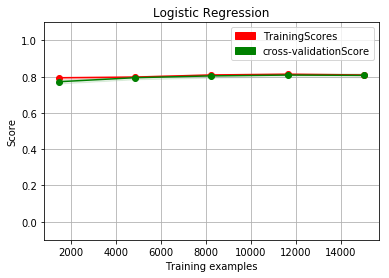

In [1611]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
import matplotlib.patches as mpatches
size = 10
cv = KFold(size, shuffle=True)
train_sizes, train_scores, test_scores = learning_curve(lr, X_train, y_train, n_jobs=-1, cv=cv, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.title("Logistic Regression")
red_patch = mpatches.Patch(color='red', label='TrainingScores')
blue_patch = mpatches.Patch(color = 'green',label = 'cross-validationScore')
plt.legend(handles=[red_patch,blue_patch])
#plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.gca().invert_yaxis()
# box-like grid
plt.grid()
# plot the std deviation as a transparent range at each training set size
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
# plot the average training and test score lines at each training set size
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
# sizes the window for readability and displays the plot
# shows error from 0 to 1.1
plt.ylim(-.1,1.1)
plt.show()

### Decision Trees

In [255]:
from sklearn import tree
model_dec = tree.DecisionTreeClassifier(class_weight= 'balanced', max_depth=10)   ## Instantiating DecisionTree-Classifier
model_dec.fit(X_train, y_train)             ## Training Model

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [256]:
train_pred1 = model_dec.predict(X_train)
test_pred1 = model_dec.predict(X_test)

In [257]:
train_metrics(y_train,train_pred1)
test_metrics(y_test,test_pred1)

Train
0.8351826306003719
[[ 2427   197     5]
 [ 2230 10884   315]
 [    0     1   614]]
             precision    recall  f1-score   support

       High       0.52      0.92      0.67      2629
        Low       0.98      0.81      0.89     13429
     Medium       0.66      1.00      0.79       615

avg / total       0.90      0.84      0.85     16673

Validation
0.8141617688217184
[[ 996  117   14]
 [ 981 4600  174]
 [   9   33  222]]
             precision    recall  f1-score   support

       High       0.50      0.88      0.64      1127
        Low       0.97      0.80      0.88      5755
     Medium       0.54      0.84      0.66       264

avg / total       0.88      0.81      0.83      7146



### Decision Tree with Tuning

In [258]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
dt = tree.DecisionTreeClassifier(class_weight= 'balanced') 
param_grid = {'criterion':['gini','entropy'],
             'max_leaf_nodes': np.arange(5,10,1),
             'min_samples_leaf':np.arange(1,5,1), 
             'min_samples_split': np.arange(0.001,0.1,0.01),
             'max_depth':np.arange(5,15,1),
             'min_weight_fraction_leaf':np.arange(0.01,0.25,0.005)}
rsearch = RandomizedSearchCV(estimator=dt, param_distributions=param_grid,n_iter=500)
rsearch.fit(X_train, y_train)
print(rsearch.best_score_)
print(rsearch.best_estimator_)

0.8134708810651953
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=8, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=0.09099999999999998,
            min_weight_fraction_leaf=0.06499999999999999, presort=False,
            random_state=None, splitter='best')


In [259]:
bst_dt=rsearch.best_estimator_

In [260]:
train_pred2 = bst_dt.predict(X_train)
test_pred2 = bst_dt.predict(X_test)

In [261]:
train_metrics(y_train,train_pred2)
test_metrics(y_test,test_pred2)

Train
0.811251724344749
[[ 1838   656   135]
 [ 1897 11204   328]
 [   71    60   484]]
             precision    recall  f1-score   support

       High       0.48      0.70      0.57      2629
        Low       0.94      0.83      0.88     13429
     Medium       0.51      0.79      0.62       615

avg / total       0.85      0.81      0.82     16673

Validation
0.820458998040862
[[ 812  270   45]
 [ 758 4849  148]
 [  39   23  202]]
             precision    recall  f1-score   support

       High       0.50      0.72      0.59      1127
        Low       0.94      0.84      0.89      5755
     Medium       0.51      0.77      0.61       264

avg / total       0.86      0.82      0.83      7146



### Random forest

In [262]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(class_weight= 'balanced',max_depth=10,max_features='sqrt') 
rfc.fit(X_train,y_train)

C:\Users\Tejasvi\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [263]:
rfcpred_test=rfc.predict(X_test)
rfcpred_train=rfc.predict(X_train)

In [264]:
train_metrics(y_train,rfcpred_train)
test_metrics(y_test,rfcpred_test)

Train
0.8121513824746597
[[ 2393   204    32]
 [ 2600 10569   260]
 [   20    16   579]]
             precision    recall  f1-score   support

       High       0.48      0.91      0.63      2629
        Low       0.98      0.79      0.87     13429
     Medium       0.66      0.94      0.78       615

avg / total       0.89      0.81      0.83     16673

Validation
0.7980688497061293
[[1001  108   18]
 [1105 4514  136]
 [  25   51  188]]
             precision    recall  f1-score   support

       High       0.47      0.89      0.61      1127
        Low       0.97      0.78      0.87      5755
     Medium       0.55      0.71      0.62       264

avg / total       0.87      0.80      0.82      7146



### Random Forest Tuning

In [265]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score
## n_jobs = -1 uses all cores of processor
## max_features is the maximum number of attributes to select for each tree
model_rf = RandomForestClassifier(n_jobs=-1, max_features='sqrt' ,class_weight='balanced')
skf= StratifiedKFold(n_splits=5, shuffle=False)
custom_scorer = make_scorer(recall_score, labels ='Medium', average = 'weighted')
# Use a grid over parameters of interest
## n_estimators is the number of trees in the forest
## max_depth is how deep each tree can be
## min_sample_leaf is the minimum samples required in each leaf node for the root node to split
## "A node will only be split if in each of it's leaf nodes there should be min_sample_leaf"

param_grid = {"n_estimators" : [50,75,100],
           "max_depth" : [8,9,10,11],
          'min_samples_leaf':[2,3,5]              
             }
 
rf_cv = GridSearchCV(estimator = model_rf, param_grid = param_grid, cv = skf,scoring=custom_scorer, n_jobs= -1)
rf_cv.fit(X_train, y_train)
bst_est = rf_cv.best_estimator_

In [266]:
train_pred4 = bst_est.predict(X_train)
test_pred4 = bst_est.predict(X_test)

In [267]:
train_metrics(y_train,train_pred4)
test_metrics(y_test,test_pred4)

Train
0.8328435194626043
[[ 2386   208    35]
 [ 2289 10892   248]
 [    3     4   608]]
             precision    recall  f1-score   support

       High       0.51      0.91      0.65      2629
        Low       0.98      0.81      0.89     13429
     Medium       0.68      0.99      0.81       615

avg / total       0.90      0.83      0.85     16673

Validation
0.8211586901763224
[[ 997  105   25]
 [ 965 4659  131]
 [  20   32  212]]
             precision    recall  f1-score   support

       High       0.50      0.88      0.64      1127
        Low       0.97      0.81      0.88      5755
     Medium       0.58      0.80      0.67       264

avg / total       0.88      0.82      0.84      7146



In [268]:
bst_est

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=11, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [269]:
rfc_50 = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=8, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=3,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
# Model training
rfc_50.fit(X = X_train,y = y_train)
# Model predictions
rfc50_train_pred = rfc_50.predict(X_train)
rfc50_test_pred = rfc_50.predict(X_test)

In [270]:
train_metrics(y_train,rfc50_train_pred)
test_metrics(y_test,rfc50_test_pred)

Train
0.7960175133449289
[[ 2366   181    82]
 [ 2733 10327   369]
 [   20    16   579]]
             precision    recall  f1-score   support

       High       0.46      0.90      0.61      2629
        Low       0.98      0.77      0.86     13429
     Medium       0.56      0.94      0.70       615

avg / total       0.88      0.80      0.82     16673

Validation
0.7891127903722363
[[1009   88   30]
 [1157 4409  189]
 [  19   24  221]]
             precision    recall  f1-score   support

       High       0.46      0.90      0.61      1127
        Low       0.98      0.77      0.86      5755
     Medium       0.50      0.84      0.63       264

avg / total       0.88      0.79      0.81      7146



Text(0.5,0,'Relative Importance')

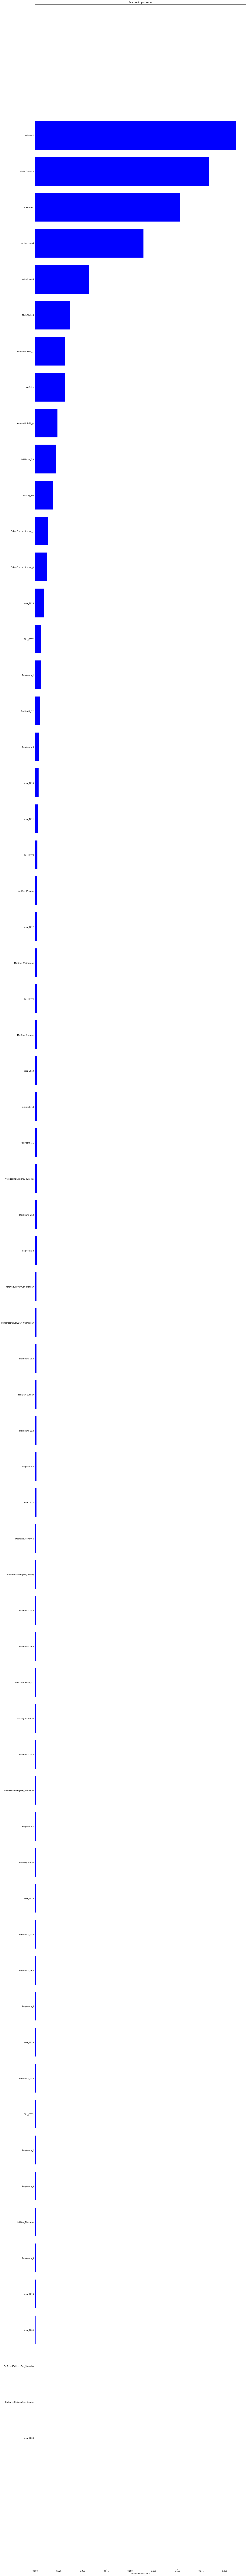

In [271]:
# from random forest
plt.figure(figsize=(20,250))
features=X_train.columns
importances = rfc_50.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

### XGBoost

In [254]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train,Y_train, weight=weightstrain) 
dtest = xgb.DMatrix(X_test, Y_test, weight=weightstest )

C:\Users\Tejasvi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Tejasvi\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [255]:
# set xgboost params
param = {
    'max_depth': 10,  # the maximum depth of each tree
    'min_child_weight': 4,
    'subsample': 0.6, 
    'max_delta_step': 3,
   'gamma' : 0.6,
    'learning_rate': 0.001,  # the training step for each iteration
   'reg_alpha' : 0,
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softmax',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this dataset
num_round = 100  # the number of training iterations

In [256]:
# training and testing - numpy matrices
bst = xgb.train(param, dtrain, num_round) 

In [257]:
preds_train= bst.predict(dtrain)
preds_test = bst.predict(dtest)

In [258]:
preds_train

array([0., 2., 0., ..., 2., 1., 2.], dtype=float32)

In [259]:
train_metrics(Y_train,preds_train)
test_metrics(Y_test,preds_test)

Train
0.8212079409824267
[[ 2346    50   233]
 [    7   590    18]
 [ 2269   404 10756]]
              precision    recall  f1-score   support

           0       0.51      0.89      0.65      2629
           1       0.57      0.96      0.71       615
           2       0.98      0.80      0.88     13429

    accuracy                           0.82     16673
   macro avg       0.68      0.88      0.75     16673
weighted avg       0.89      0.82      0.84     16673

Validation
0.818639798488665
[[ 998   28  101]
 [   7  242   15]
 [ 967  178 4610]]
              precision    recall  f1-score   support

           0       0.51      0.89      0.64      1127
           1       0.54      0.92      0.68       264
           2       0.98      0.80      0.88      5755

    accuracy                           0.82      7146
   macro avg       0.67      0.87      0.73      7146
weighted avg       0.89      0.82      0.84      7146



#### Predicting on Test data

In [277]:
dTest = xgb.DMatrix(merged_test1)
test_preds = bst.predict(dTest)

In [279]:
final7= pd.DataFrame({'CustomerID': merged_test['CustomerID'], 'preds': test_preds})
final7.preds= final7.preds.astype('int8')
final7.to_csv('final7.csv',index=False)

In [281]:
final7[final7.preds ==1].count()

CustomerID    403
preds         403
dtype: int64

### XGB Tunning

In [283]:
#GridSearch on XGboost
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score

XGB_grid = XGBClassifier(n_jobs=-1, objective= 'multi:softmax', n_estimators= 100)
skf= StratifiedKFold(n_splits=5, shuffle=True,random_state= 42)
custom_scorer = make_scorer(recall_score, average = 'weighted')

param_grid = {
    "colsample_bytree" : np.linspace(0.5,0.9,2), #takes range from 0.5 to 0.9 randomly 5 values
   
    "max_depth" : [10,12,14],
    'learning_rate': np.linspace(0.001,0.1,4)
}

XGB_cv_grid=GridSearchCV(estimator = XGB_grid, param_grid = param_grid, cv = skf,scoring=custom_scorer,verbose=2,n_jobs=-1) #Cross validation=5

In [284]:
#Fit the gridsearch XGB model and predict on best parameters
XGB_cv_grid.fit(X_train,y_train, sample_weight= weightstrain)
best_est_xgb = XGB_cv_grid.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 19.2min finished


In [285]:
best_est_xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=14, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [286]:
preds_train1= best_est_xgb.predict(X_train)
preds_test1 = best_est_xgb.predict(X_test)

C:\Users\Tejasvi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Tejasvi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [287]:
train_metrics(y_train,preds_train1)
test_metrics(y_test,preds_test1)

Train
0.8828045342769747
[[ 2524   104     1]
 [ 1703 11580   146]
 [    0     0   615]]
             precision    recall  f1-score   support

       High       0.60      0.96      0.74      2629
        Low       0.99      0.86      0.92     13429
     Medium       0.81      1.00      0.89       615

avg / total       0.92      0.88      0.89     16673

Validation
0.8480268681780017
[[ 966  148   13]
 [ 787 4870   98]
 [  10   30  224]]
             precision    recall  f1-score   support

       High       0.55      0.86      0.67      1127
        Low       0.96      0.85      0.90      5755
     Medium       0.67      0.85      0.75       264

avg / total       0.89      0.85      0.86      7146



In [289]:
from xgboost import XGBClassifier

xgb1=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0.3, learning_rate=0.003, max_delta_step=3,
       max_depth=10, min_child_weight=3, missing=None, n_estimators=150,
       n_jobs=-1, objective='multi:softmax', 
       reg_alpha=0.5, reg_lambda=1, scale_pos_weight=0.6, seed=None,
       silent=True, subsample=0.7)

In [290]:
xgb1.fit(X_train,y_train, sample_weight= weightstrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0.3, learning_rate=0.003,
       max_delta_step=3, max_depth=10, min_child_weight=3, missing=None,
       n_estimators=150, n_jobs=-1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0.5,
       reg_lambda=1, scale_pos_weight=0.6, seed=None, silent=True,
       subsample=0.7)

In [291]:
preds_train2= xgb1.predict(X_train)
preds_test2 = xgb1.predict(X_test)

C:\Users\Tejasvi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Tejasvi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [292]:
train_metrics(y_train,preds_train2)
test_metrics(y_test,preds_test2)

Train
0.8224074851556409
[[ 2352   241    36]
 [ 2214 10763   452]
 [    1    17   597]]
             precision    recall  f1-score   support

       High       0.51      0.89      0.65      2629
        Low       0.98      0.80      0.88     13429
     Medium       0.55      0.97      0.70       615

avg / total       0.89      0.82      0.84     16673

Validation
0.8180800447802967
[[ 998  105   24]
 [ 934 4606  215]
 [   6   16  242]]
             precision    recall  f1-score   support

       High       0.51      0.89      0.65      1127
        Low       0.97      0.80      0.88      5755
     Medium       0.50      0.92      0.65       264

avg / total       0.88      0.82      0.83      7146



Text(0.5,0,'Relative Importance')

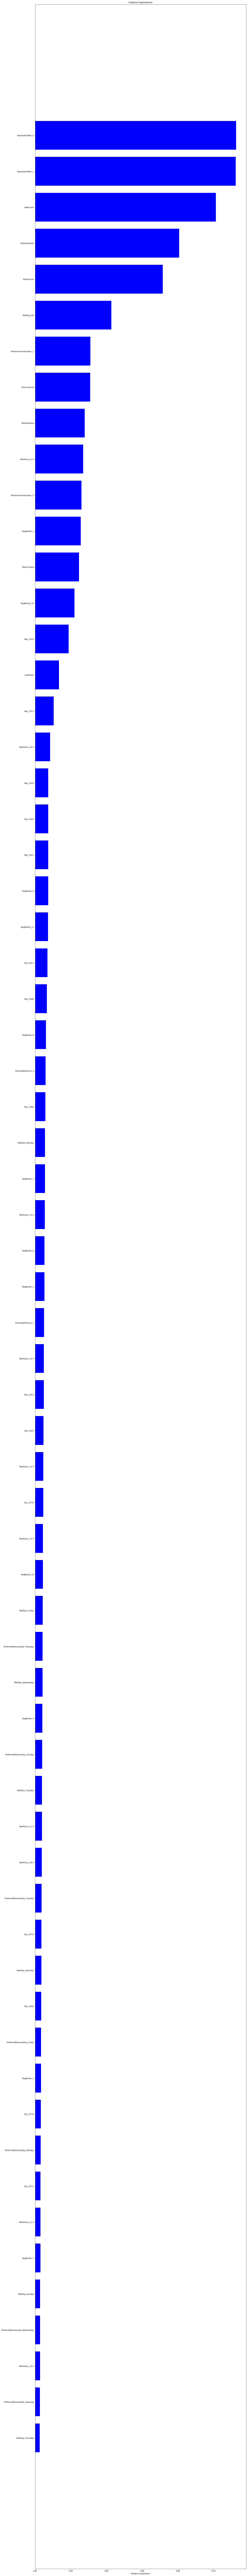

In [293]:
plt.figure(figsize=(20,250))
features=X_train.columns
importances = xgb1.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

#### Predicting on test data

In [295]:
test_pred1 = xgb1.predict(merged_test1)

C:\Users\Tejasvi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [296]:
#final4= pd.DataFrame({'CustomerID': merged_test['CustomerID'], 'preds': test_pred1})
#final4.to_csv('final4.csv',index=False)

### SVM

In [702]:
# training a linear SVM classifier 
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C =50 ,class_weight='balanced',decision_function_shape='ovo',gamma=0.9).fit(X_train, Y_train)#sample_weight=weightstrain) 
svm_test = svm_model_linear.predict(X_test) 
svm_train = svm_model_linear.predict(X_train) 

In [703]:
train_metrics(Y_train,svm_train)
test_metrics(Y_test,svm_test)

             precision    recall  f1-score   support

          0       0.44      0.89      0.59      2629
          1       0.35      0.88      0.50       615
          2       0.98      0.72      0.83     13429

avg / total       0.87      0.75      0.78     16673

             precision    recall  f1-score   support

          0       0.44      0.87      0.58      1127
          1       0.35      0.85      0.49       264
          2       0.98      0.72      0.83      5755

avg / total       0.87      0.75      0.78      7146



### SVM Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

svc_grid = SVC()
param_grid = {
'C': [0.001, 0.01, 0.1, 1, 10],
'gamma': [0.001, 0.01, 0.1, 1], 
'kernel':['linear', 'poly', 'rbf', 'sigmoid']} 

svc_cv_grid = RandomizedSearchCV(estimator = svc_grid, param_distributions = param_grid, cv = 10,n_iter=20)

In [ ]:
svc_cv_grid.fit(X = X_train, y = Y_train)

In [ ]:
svm_test1 = svc_cv_grid.predict(X_test) 
svm_train1 = svc_cv_grid.predict(X_train)

In [ ]:
train_metrics(Y_train,svm_train1)
test_metrics(Y_test,svm_test1)

### KNN

In [706]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 5,weights="distance",algorithm="brute").fit(X_train, Y_train) 
  
# creating a confusion matrix 
knn_test = knn.predict(X_test)  
knn_train = knn.predict(X_train)  

In [707]:
train_metrics(Y_train,knn_train)
test_metrics(Y_test,knn_test)

             precision    recall  f1-score   support

          0       0.94      0.85      0.89      2629
          1       0.99      0.96      0.98       615
          2       0.97      0.99      0.98     13429

avg / total       0.97      0.97      0.97     16673

             precision    recall  f1-score   support

          0       0.58      0.50      0.54      1127
          1       0.72      0.36      0.48       264
          2       0.90      0.94      0.92      5755

avg / total       0.84      0.85      0.84      7146



### KNN Tuning

In [718]:
knn_classifier = KNeighborsClassifier(algorithm="brute")

In [719]:
params = {"n_neighbors": [1,3,5,7,9],"metric": ["euclidean", "cityblock"]}
grid = RandomizedSearchCV(knn_classifier, param_distributions=params, scoring="accuracy",cv=3)

In [721]:
grid.fit(X_train, Y_train)

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_neighbors': [1, 3, 5, 7, 9], 'metric': ['euclidean', 'cityblock']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [722]:
grid.best_estimator_

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [723]:
knncv_test = grid.predict(X_test)  
knncv_train = grid.predict(X_train)  

In [724]:
train_metrics(Y_train,knncv_train)
test_metrics(Y_test,knncv_test)

             precision    recall  f1-score   support

          0       0.71      0.57      0.63      2629
          1       0.90      0.40      0.56       615
          2       0.91      0.97      0.94     13429

avg / total       0.88      0.88      0.88     16673

             precision    recall  f1-score   support

          0       0.61      0.49      0.54      1127
          1       0.79      0.31      0.44       264
          2       0.90      0.96      0.92      5755

avg / total       0.85      0.86      0.85      7146



### Naive Bayes

In [1694]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train, sample_weight= weightstrain) 
gnb_test = gnb.predict(X_test) 
gnb_train = gnb.predict(X_train) 

In [1695]:
train_metrics(y_train,gnb_train)
test_metrics(y_test,gnb_test)

             precision    recall  f1-score   support

       High       0.29      0.93      0.44      2629
        Low       0.97      0.49      0.65     13429
     Medium       0.26      0.51      0.34       615

avg / total       0.83      0.56      0.61     16673

             precision    recall  f1-score   support

       High       0.29      0.94      0.44      1127
        Low       0.97      0.50      0.65      5755
     Medium       0.24      0.47      0.32       264

avg / total       0.83      0.56      0.61      7146



### Ada Boost 

In [731]:
#GridSearch
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

Adboost_grid = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5))

param_grid = {
    "n_estimators" : [50,75,100,150],
'learning_rate': np.linspace(0.001,0.1,4)}

Adboost_cv_grid=GridSearchCV(estimator = Adboost_grid, param_grid = param_grid, cv = 5,verbose=2,n_jobs=-1) #Cross validation=5

In [732]:
#Fit the gridsearch Adaboost model and predict on best parameters
Adboost_cv_grid.fit(X_train,y_train, sample_weight = weightstrain)
best_est_ada = Adboost_cv_grid.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.6min finished


In [733]:
#predictions for the Adaboost model best parameters
new_train_pred_ada = best_est_ada.predict(X_train)
new_test_pred_ada = best_est_ada.predict(X_test)

In [734]:
train_metrics(y_train,new_train_pred_ada)
test_metrics(y_test,new_test_pred_ada)

             precision    recall  f1-score   support

       High       0.47      0.92      0.62      2629
        Low       0.98      0.80      0.88     13429
     Medium       0.97      0.85      0.91       615

avg / total       0.90      0.82      0.84     16673

             precision    recall  f1-score   support

       High       0.45      0.87      0.59      1127
        Low       0.96      0.79      0.87      5755
     Medium       0.91      0.77      0.83       264

avg / total       0.88      0.81      0.83      7146



In [1699]:
Adaboost_model=AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=12,min_samples_split=3),
    n_estimators = 100,
    learning_rate = 0.1) #no of models is n_estimators
Adaboost_model.fit(X_train,y_train, sample_weight=weightstrain)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.1, n_estimators=100, random_state=None)

In [1700]:
y_adapred_test=Adaboost_model.predict(X_test)
y_adapred_train=Adaboost_model.predict(X_train)

In [1701]:
train_metrics(y_train,y_adapred_train)
test_metrics(y_test,y_adapred_test)

             precision    recall  f1-score   support

       High       0.68      0.97      0.80      2629
        Low       0.99      0.91      0.95     13429
     Medium       0.98      0.96      0.97       615

avg / total       0.94      0.92      0.93     16673

             precision    recall  f1-score   support

       High       0.52      0.72      0.60      1127
        Low       0.94      0.87      0.90      5755
     Medium       0.82      0.73      0.77       264

avg / total       0.87      0.84      0.85      7146



### ANN

In [1702]:
from keras.models import Sequential 
from keras.layers import Dense

C:\Users\Tejasvi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [1703]:
# 'to_categorical' converts the class lebels to one-hot vectors. One-hot vector is nothing but dummifying in R.
from keras.utils import to_categorical
y_train = to_categorical(y_train1)
y_test = to_categorical(y_test1)
print('y_train shape: {}'.format(y_train.shape))

y_train shape: (16673, 3)


In [1725]:
model = Sequential() # This initializes a sequential model to which we can keep adding layers.
model.add(Dense(200, kernel_initializer='random_uniform', 
                input_dim = 60, activation='relu')) # Add a dense layer 
model.add(Dense(3, kernel_initializer='uniform', 
                activation='softmax')) # Add output layer

In [1781]:
from keras.optimizers import Adam, SGD
#from keras.callbacks import EarlyStopping

adam = Adam(lr=0.0001)
sgd = SGD(lr=0.0011, decay=1e-6, momentum=0.9, nesterov=True)
#callbacks
#earlystopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

model.compile(loss='categorical_crossentropy', # CrossEntropy is the loss function. 
              optimizer=adam,            # Mention the optimizer
              metrics=['accuracy'])            # Mention the metric to be printed while training

In [1783]:
class_weight = {0: 5.,
                1: 30.,
                2: 1.}

In [1784]:
nb_epochs = 100
# training the MLP model
history = model.fit(X_train, y_train, epochs=nb_epochs, batch_size=64, class_weight=class_weight) 

Epoch 1/100
16673/16673 [==============================] - 1s 34us/step - loss: 0.8328 - acc: 0.8000
Epoch 2/100
16673/16673 [==============================] - 0s 17us/step - loss: 0.8312 - acc: 0.8021
Epoch 3/100
16673/16673 [==============================] - 0s 16us/step - loss: 0.8305 - acc: 0.8020
Epoch 4/100
16673/16673 [==============================] - 0s 17us/step - loss: 0.8302 - acc: 0.8024
Epoch 5/100
16673/16673 [==============================] - 0s 16us/step - loss: 0.8302 - acc: 0.8021
Epoch 6/100
16673/16673 [==============================] - 0s 16us/step - loss: 0.8301 - acc: 0.8024
Epoch 7/100
16673/16673 [==============================] - 0s 16us/step - loss: 0.8299 - acc: 0.8026
Epoch 8/100
16673/16673 [==============================] - 0s 16us/step - loss: 0.8298 - acc: 0.8019
Epoch 9/100
16673/16673 [==============================] - 0s 16us/step - loss: 0.8297 - acc: 0.8024
Epoch 10/100
16673/16673 [==============================] - 0s 16us/step - loss: 0.8297 - a

In [1785]:
ann_train= model.predict_classes(X_train)
ann_test= model.predict_classes(X_test)

In [1787]:
train_metrics(y_train,ann_train)
test_metrics(y_test,ann_test)

             precision    recall  f1-score   support

          0       0.49      0.87      0.63      2629
          1       0.45      0.98      0.62       615
          2       0.98      0.78      0.87     13429

avg / total       0.88      0.80      0.82     16673

             precision    recall  f1-score   support

          0       0.48      0.83      0.61      1127
          1       0.39      0.86      0.54       264
          2       0.97      0.78      0.87      5755

avg / total       0.87      0.79      0.81      7146



## Clustering

In [1612]:
d=merged_test.drop(['CustomerID'], axis=1)

In [1613]:
d.columns

Index(['City', 'OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery',
       'PreferredDeliveryDay', 'RegMonth', 'Year', 'Mailcount', 'MailDay',
       'MailHours', 'MailsOpened', 'MailsClicked', 'OrderQuantity',
       'OrderCount', 'LastOrder', 'Active period'],
      dtype='object')

In [1614]:
features_train = merged_data1.drop(['City','DoorstepDelivery','PreferredDeliveryDay','RetentionPotential'],axis=1)
features_test = d.drop(['City','DoorstepDelivery','PreferredDeliveryDay'],axis=1)

In [1615]:
print(features_train.shape)
print(features_test.shape)

(23819, 13)
(5955, 13)


In [1616]:
features_train.head()

,OnlineCommunication,AutomaticRefill,RegMonth,Year,Mailcount,MailDay,MailHours,MailsOpened,MailsClicked,OrderQuantity,OrderCount,LastOrder,Active period
0,0,0,9,2012,29,Monday,13.0,29,1,15,1,71,0
1,1,1,12,2010,95,Saturday,14.0,88,10,15614,186,65,1024
2,0,0,10,2010,0,Nil,0.0,0,0,443,13,96,217
3,0,0,11,2010,30,Sunday,16.0,27,4,748,7,77,791
4,1,1,12,2009,64,Friday,16.0,18,10,2350,34,65,848


In [1617]:
cat_train = features_train[['RegMonth','Year','MailDay','MailHours']]
num_train = features_train[['OnlineCommunication','AutomaticRefill','Mailcount','MailsOpened','MailsClicked',\
                           'OrderQuantity','OrderCount','LastOrder','Active period']]

In [1618]:
cat_test = features_test[['RegMonth','Year','MailDay','MailHours']]
num_test = features_test[['OnlineCommunication','AutomaticRefill','Mailcount','MailsOpened','MailsClicked',\
                         'OrderQuantity','OrderCount','LastOrder','Active period']]

In [1619]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cat_train = cat_train.apply(le.fit_transform)

In [1620]:
from sklearn import preprocessing
le1 = preprocessing.LabelEncoder()
cat_test = cat_test.apply(le1.fit_transform)

In [1621]:
train_data = pd.concat([cat_train, num_train], axis = 1)
test_data = pd.concat([cat_test, num_test], axis = 1)

In [1622]:
for col in train_data.columns:
    train_data[col]= train_data[col].astype('int16')
for col in test_data.columns:
    test_data[col]= test_data[col].astype('int16')    

In [1623]:
train_data = train_data.apply(lambda x: (x - x.mean()) / np.std(x))

In [1624]:
test_data = test_data.apply(lambda x: (x - x.mean()) / np.std(x))

In [1625]:
train_data.head()

,RegMonth,Year,MailDay,MailHours,OnlineCommunication,AutomaticRefill,Mailcount,MailsOpened,MailsClicked,OrderQuantity,OrderCount,LastOrder,Active period
0,0.339570,-0.605694,-1.020266,0.483763,-1.394625,-0.323456,0.412525,2.793407,-0.065148,-0.260256,-0.279802,0.315074,-0.394160
1,1.271534,-1.630377,0.046675,0.824693,0.717038,3.091612,3.705850,9.720454,3.716532,11.781580,14.956098,0.044758,4.248225
2,0.650224,-1.630377,-0.486795,-0.879957,-1.394625,-0.323456,-1.034542,-0.611413,-0.485334,0.070144,0.708473,1.441392,0.589627
3,0.960879,-1.630377,0.580145,1.506552,-1.394625,-0.323456,0.462424,2.558592,1.195412,0.305593,0.214336,0.585390,3.191901
4,1.271534,-2.142718,-1.553736,1.506552,0.717038,3.091612,2.158985,1.501924,3.716532,1.542276,2.437953,0.044758,3.450315


In [1626]:
from kmodes.kprototypes import KPrototypes
wss = []
for k in range(1,7):
    km = KPrototypes(n_clusters=k)
    km.fit(train_data, categorical=[0,1,2,3,4,5])
    wss.append(km.cost_)

In [1]:
# %matplotlib inline

# plt.plot(range(3,8), wss, 'bx--')
# plt.xlabel('k')
# plt.ylabel('wss')
# plt.show()

In [1331]:
from kmodes.kprototypes import KPrototypes

kproto = KPrototypes(n_clusters=3, init='Cao', verbose=0)
clusters = kproto.fit(train_data, categorical=[0,1,2,3,4,5])
#print(kproto.cluster_centroids_)

In [1332]:
set(kproto.labels_)

{0, 1, 2}

In [1333]:
result = pd.DataFrame({"Label":merged_data.CustomerID, "Cluster":clusters})
result.head()

,Label,Cluster
0,C16368,0
1,C20345,2
2,C17683,1
3,C18647,0
4,C36692,0


In [1334]:
test_clusters= kproto.predict(test_data,categorical=[0,1,2,3,4,5])

In [1335]:
test_result = pd.DataFrame({"Label":merged_test.CustomerID, "Cluster":test_clusters})
test_result.head()

,Label,Cluster
0,C17838,1
1,C12403,2
2,C19041,2
3,C24069,1
4,C26718,2


### Patterns and suggestions using Decision Trees

In [1351]:
from sklearn import tree
model_pat = tree.DecisionTreeClassifier(class_weight= 'balanced', max_depth=8)   ## Instantiating DecisionTree-Classifier
model_pat.fit(X, y)             ## Training Model

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [1352]:
model_pat.score(X, y)

0.8434862924556027

In [1354]:
import graphviz 

dot_data = tree.export_graphviz(model_pat, out_file=None, 
                                feature_names=X.columns,  
                                class_names=y,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
#this will create an iris.pdf file with the rule path
graph.render("dt_for_patterns")

'dt_for_patterns.pdf'

#### Rules for High

#### 1. lastorder<= 69.5 & mailcount<=0.5 & OC_0 <= 0.5 & ordercount <= 5.5 & orderquantity<=187.5

#### 2. lastorder<= 69.5 & mailcount<=0.5 & OC_0 <= 0.5 & regMonth_9 <= 0.5 & mailcount <= 0.5

#### 3. lastorder<= 69.5  & ordercount<= 4.5 & mailclicked <=0.5 & year_2013 <= 0.5 & orderquantity <=188

#### 4. lastorder<= 69.5  & ordercount<= 4.5 & mailclicked <=0.5 & year_2013 <= 0.5 & mailcount <=0.5

#### 5. AR_1<= 0.5 & orderquantity <= 173.5

#### Rules for Medium

#### 1. regmonth_1 <= 0.5 & regmonth_12 <= 0.5 & mailcount <= 0.5 & orderquantity <- 40.5 & lastorder <= 20.5

#### 2. regmonth_1 <= 0.5 & regmonth_12 <= 0.5 & mailcount <= 0.5 & mailclicked <=2.5 & lastorder <= 18

#### 3. mailcount <= 3.5 & mailopened <= 1.5 & mailcount <= 2.5

#### 4. mailcount <= 3.5 & mailopened <= 1.5 & active period <= 3.5 

#### 5. active period <= 24.5 & orderquantity <= 178 & lastorder <= 108 

#### 6. mailcount <= 29.5 & ordercount <= 4.5 & mailcount <= 15.5 & orderquantity <=283 & active period <=2.0 & ordercount <=3.5 & mailsclicked <= 1.5

#### Rules for Low 

#### 1. mailcount<= 44.5 & ordercount <= 59.5 & mailsopened <=2.5 & ordercount <= 17.5 & regmonth_4 <= 0.5 

#### 2. mailcount<= 34.5 & orderquantity <= 672 & year_2016 <= 0.5 & mailsopened <= 0.5

#### 3. mailcount<= 44.5 & regmonth_7 <= 0.5 & mailopened <= 15.5

#### 4. mailcount<= 44.5 & ordercount <= 59.5 & mailsopened <=2.5 & ordercount <= 17.5 & active period <= 127.5

#### 5. mailcount<= 44.5 & ordercount <= 59.5 & mailsopened <=2.5 & mailday_sat <=0.5 & year_2015